**Summary**:

The following notebook contains the entire code for the Data Science Challenge regarding the *French Motor Claims Dataset*. First, descriptive statistics of the dataset are looked at in order to be able to look at univariate distributions as well as influences on the target variable. This is followed by data cleaning, in which missing claim amounts are filled in using k-nearest neighbors. The analysis is concluded with the estimation of a baseline model in the form of a linear regression and two non-linear models (random forest, generalized linear models).
___

## Import packages:

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import tqdm
import copy
import scipy

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Read in the data:

In [2]:
data = pd.read_csv("freMTPL2freq.csv")
costs = pd.read_csv("freMTPL2sev.csv")

## Descriptive Statistics:

List of variables contained in the df:

In [42]:
data.columns

Index(['IDpol', 'ClaimNb', 'Exposure', 'Area', 'VehPower', 'VehAge', 'DrivAge',
       'BonusMalus', 'VehBrand', 'VehGas', 'Density', 'Region'],
      dtype='object')

Description of variable meaning:
1. **IDpol**: Policy ID used to link with the claims dataset.

2. **ClaimNb**: Number of claims during the exposure period.

3. **Exposure**: The exposure period for the motor third-party liability policy.

4. **Area**: Area code indicating the geographical location.

5. **VehPower**: Power of the car, presented as an ordered categorical variable.

6. **VehAge**: Age of the vehicle in years.

7. **DrivAge**: Age of the driver in years; note that people can drive a car at 18 in France.

8. **BonusMalus**: Bonus/malus score ranging between 50 and 350; <100 means a bonus, >100 means a malus in France (Schadenfreiheitsklasse in Germany)

9. **VehBrand**: The car brand with unknown categories.

10. **VehGas**: The type of car fuel – Diesel or regular.

11. **Density**: Density of inhabitants, measured as the number of inhabitants per square kilometer, in the city where the driver of the car lives.

12. **Region**: Policy regions in France based on a standard French classification.



## Metrische / Ordinale Variablen:

In [43]:
%matplotlib notebook

### ClaimNb:

<IPython.core.display.Javascript object>


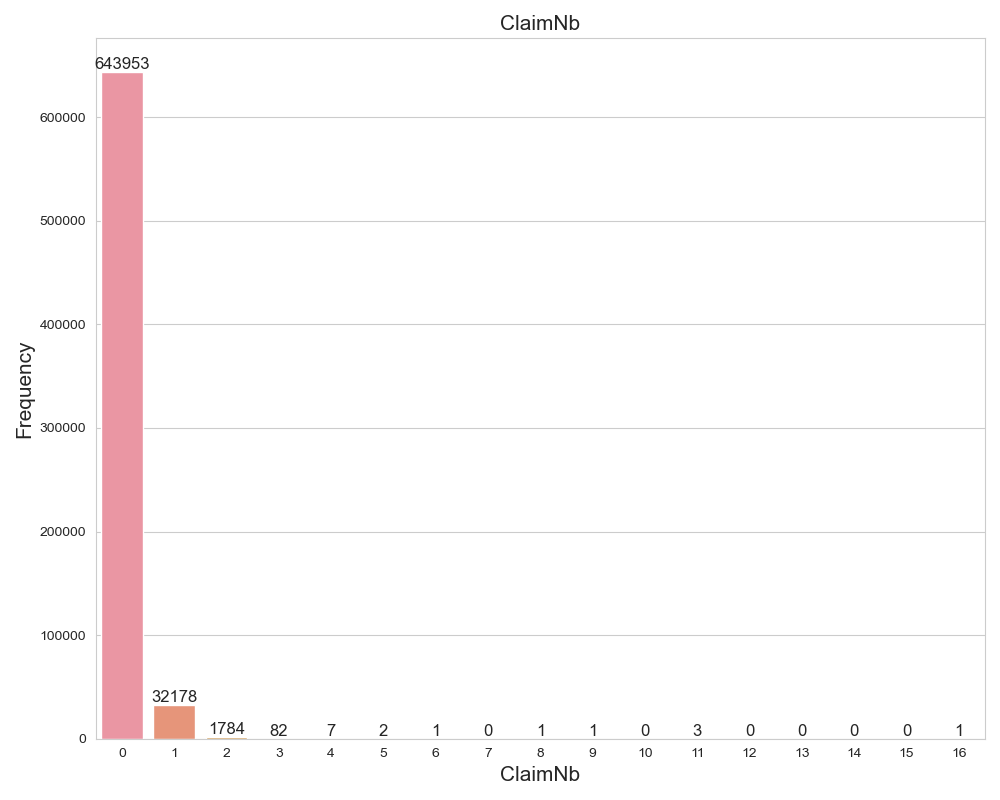

In [7]:

var_index = 0
var = "ClaimNb"

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
max_val = np.max(data[var])
freq = [(data[var] == el).sum() for el in np.arange(max_val+1)]
sns.barplot(x=np.arange(max_val+1), y=freq, ax=ax)

# Add frequency as text above each bar with increased font size
for i, v in enumerate(freq):
    ax.text(i, v + 0.01, str(v), ha='center', va='bottom', fontsize=12)

# Increase font size for labels and title
ax.set_xlabel(var, fontsize=15)
#ax.set_xlabel(str(data[var].describe()), fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)
plt.title(var, fontsize=15)

plt.tight_layout()
plt.show()


In [11]:
data[var].describe()

count    678013.000000
mean          6.454631
std           2.050906
min           4.000000
25%           5.000000
50%           6.000000
75%           7.000000
max          15.000000
Name: VehPower, dtype: float64

### VehPower:

<IPython.core.display.Javascript object>


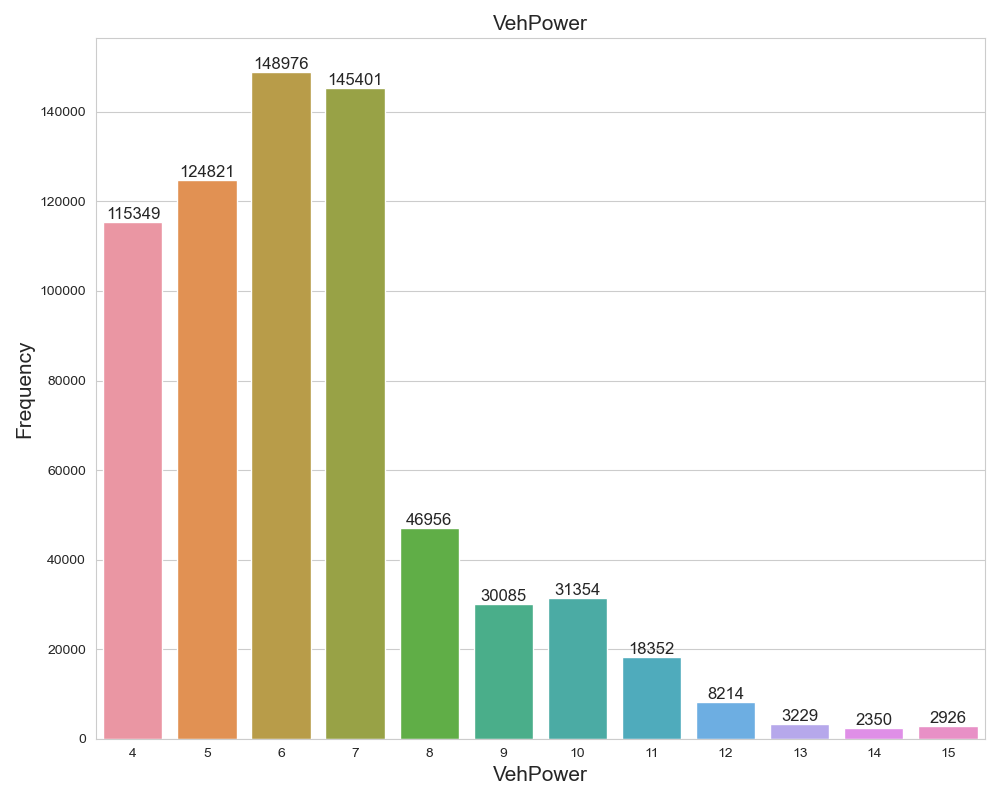

In [12]:

var_index = 0
var = "VehPower"

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
max_val = np.max(data[var])
min_val = np.min(data[var])
freq = [(data[var] == el).sum() for el in np.arange(min_val,max_val+1)]
sns.barplot(x=np.arange(min_val,max_val+1), y=freq, ax=ax)

# Add frequency as text above each bar with increased font size
for i, v in enumerate(freq):
    ax.text(i, v + 0.01, str(v), ha='center', va='bottom', fontsize=12)

# Increase font size for labels and title
ax.set_xlabel(var, fontsize=15)
#ax.set_xlabel(str(data[var].describe()), fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)
plt.title(var, fontsize=15)

plt.tight_layout()
plt.show()


In [17]:
data[var].describe()

count    678013.000000
mean         45.499122
std          14.137444
min          18.000000
25%          34.000000
50%          44.000000
75%          55.000000
max         100.000000
Name: DrivAge, dtype: float64

### VehAge:

<IPython.core.display.Javascript object>


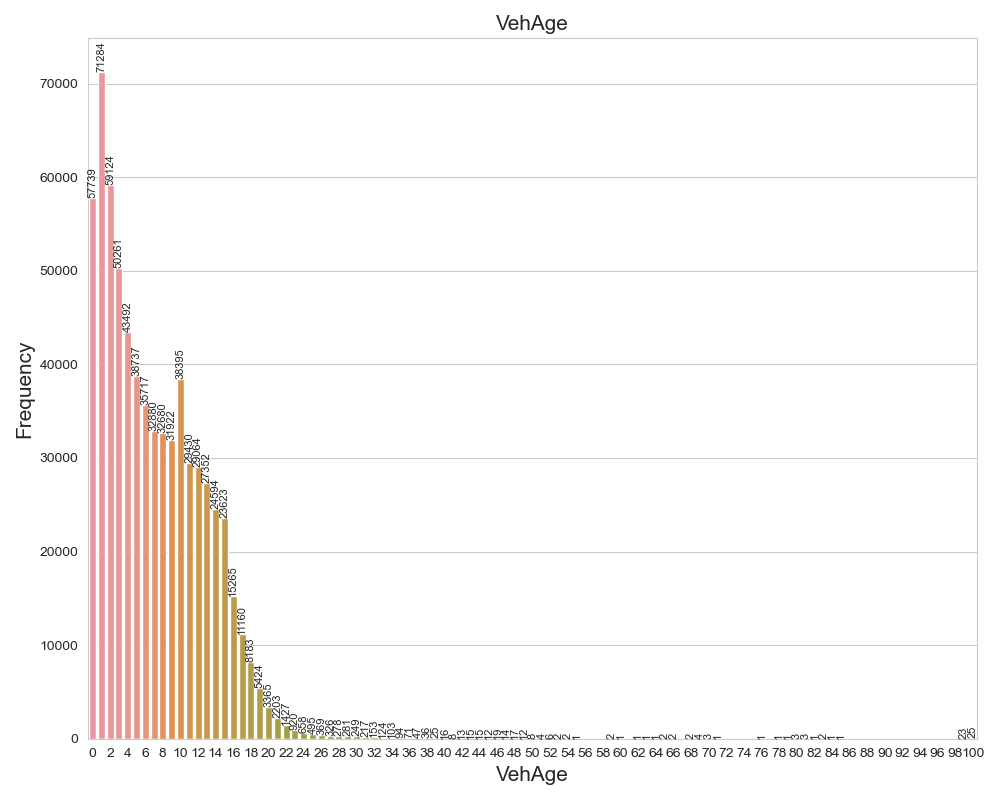

In [18]:

var_index = 0
var = "VehAge"

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
max_val = np.max(data[var])
min_val = np.min(data[var])
freq = [(data[var] == el).sum() for el in np.arange(min_val,max_val+1)]
sns.barplot(x=np.arange(min_val,max_val+1), y=freq, ax=ax)

# Add frequency as text above each bar with increased font size
for i, v in enumerate(freq):
    if v > 0:
        ax.text(i, v + 0.01, str(v), ha='center', va='bottom', fontsize=8, rotation='vertical')

# Increase font size for labels and title
ax.set_xlabel(var, fontsize=15)
#ax.set_xlabel(str(data[var].describe()), fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)
plt.title(var, fontsize=15)


plt.xticks(np.arange(min_val, max_val + 1, step=2))  # Set ticks every 2 units


plt.tight_layout()
plt.show()


In [29]:
data['VehAge'].describe()

count    678013.000000
mean          7.044265
std           5.666232
min           0.000000
25%           2.000000
50%           6.000000
75%          11.000000
max         100.000000
Name: VehAge, dtype: float64

### DrivAge:

<IPython.core.display.Javascript object>


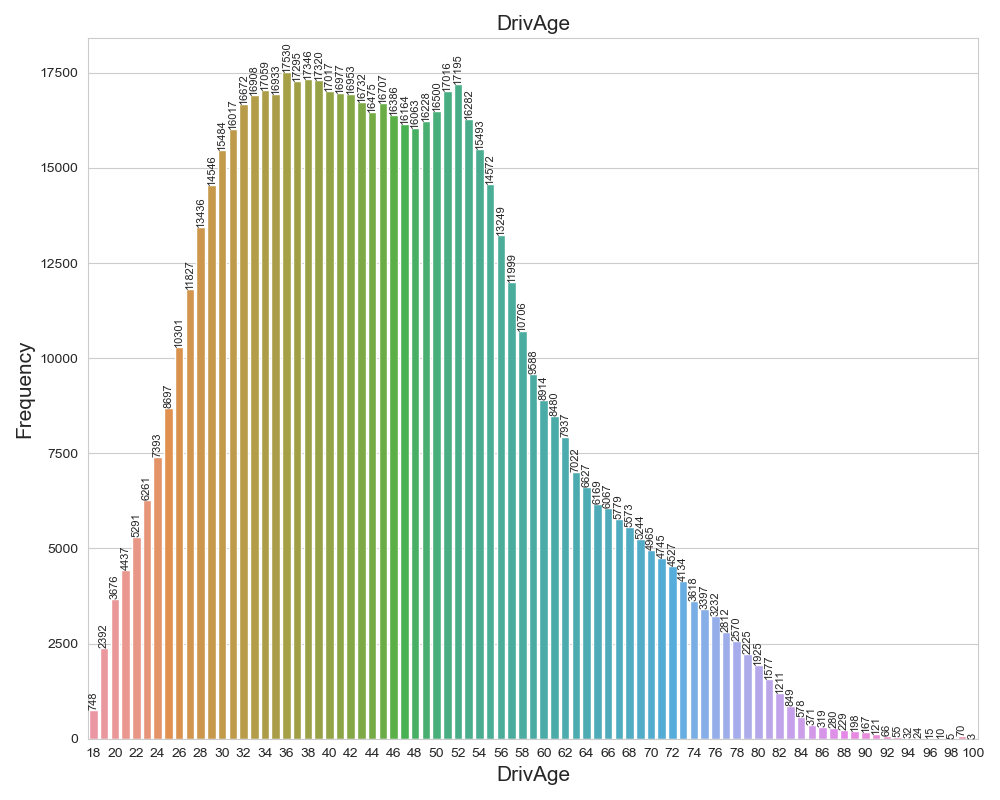

In [20]:
var_index = 0
var = "DrivAge"

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
max_val = np.max(data[var])
min_val = np.min(data[var])
freq = [(data[var] == el).sum() for el in np.arange(min_val,max_val+1)]
sns.barplot(x=np.arange(min_val,max_val+1), y=freq, ax=ax)

# Add frequency as text above each bar with increased font size
for i, v in enumerate(freq):
    if v > 0:
        ax.text(i, v + 0.01, str(v), ha='center', va='bottom', fontsize=8, rotation='vertical')

# Increase font size for labels and title
ax.set_xlabel(var, fontsize=15)
#ax.set_xlabel(str(data[var].describe()), fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)
plt.title(var, fontsize=15)


plt.xticks(np.arange(0, max_val-min_val + 1, step=2), np.arange(min_val, max_val + 1, step=2))  # Set ticks every 2 units


plt.tight_layout()
plt.show()


In [30]:
data[var].describe()

count     678013
unique        11
top          B12
freq      166024
Name: VehBrand, dtype: object

### BonusMalus:

<IPython.core.display.Javascript object>


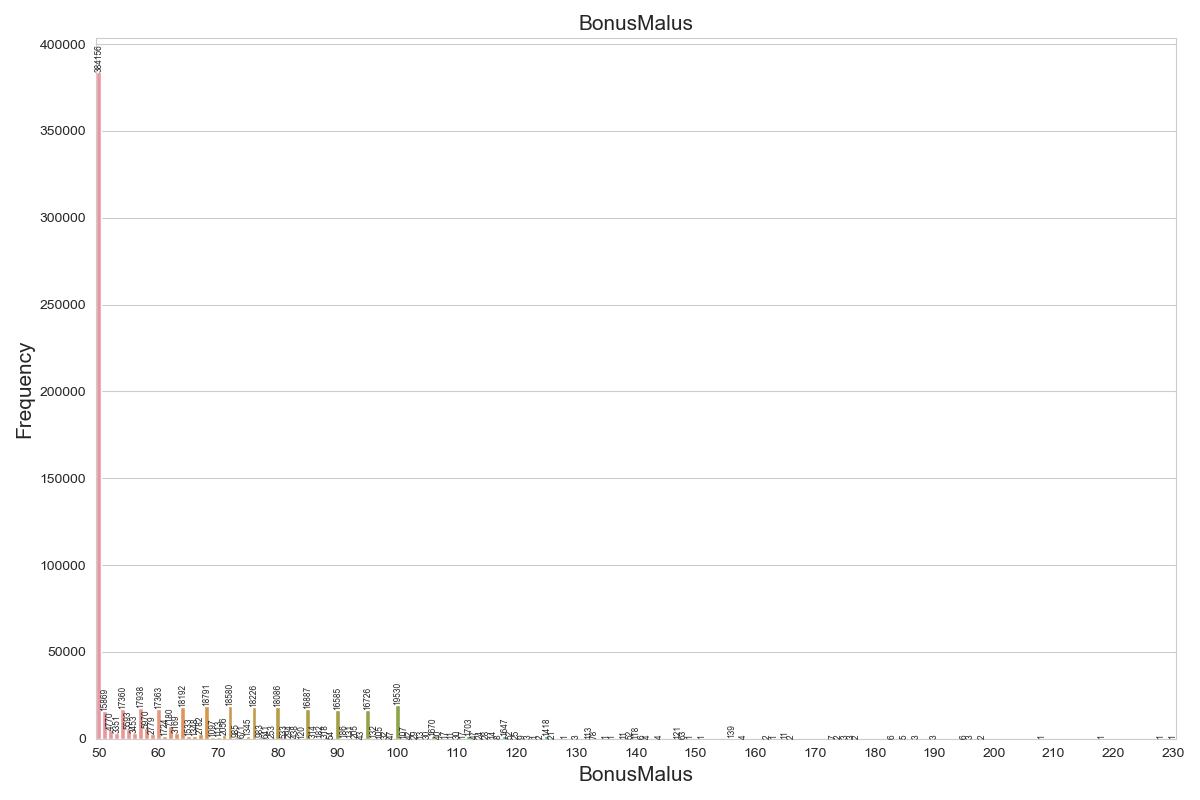

In [22]:
var_index = 0
var = "BonusMalus"

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
max_val = np.max(data[var])
min_val = np.min(data[var])
freq = [(data[var] == el).sum() for el in np.arange(min_val,max_val+1)]
sns.barplot(x=np.arange(min_val,max_val+1), y=freq, ax=ax)

# Add frequency as text above each bar with increased font size
for i, v in enumerate(freq):
    if v > 0:
        ax.text(i, v + 0.01, str(v), ha='center', va='bottom', fontsize=6, rotation='vertical')

# Increase font size for labels and title
ax.set_xlabel(var, fontsize=15)
#ax.set_xlabel(str(data[var].describe()), fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)
plt.title(var, fontsize=15)


plt.xticks(np.arange(0, max_val-min_val + 1, step=10), np.arange(min_val, max_val + 1, step=10))  # Set ticks every 2 units


plt.tight_layout()
plt.show()


In [31]:
data[var].describe()

count     678013
unique        11
top          B12
freq      166024
Name: VehBrand, dtype: object

In [24]:
print("Frequency of\n Bonus: %f\n Malus: %f"%((data[var]<= 100).mean(),(data[var]>100).mean()))

Frequency of
 Bonus: 0.988505
 Malus: 0.011495


### Exposure:

<IPython.core.display.Javascript object>


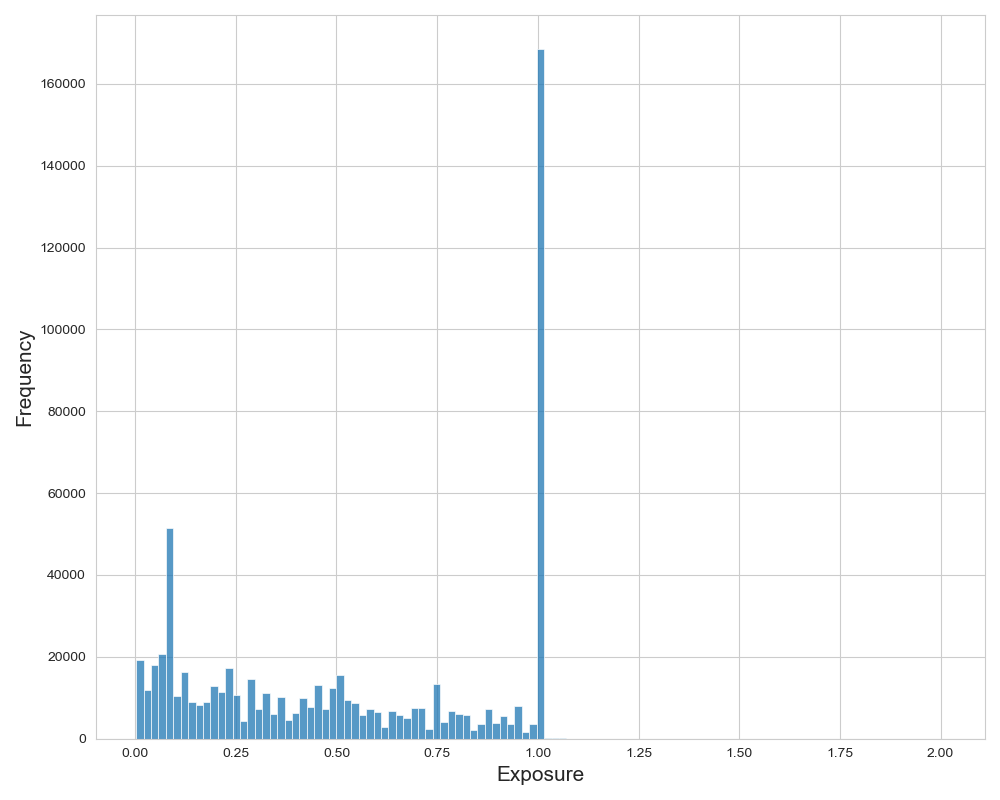

count    678013.000000
mean          0.528750
std           0.364442
min           0.002732
25%           0.180000
50%           0.490000
75%           0.990000
max           2.010000
Name: Exposure, dtype: float64


In [25]:
var_index = 0
var_list = ["Exposure"]

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.histplot(data[var_list[var_index]], ax=ax)

# Increase font size for x-axis label and title
ax.set_xlabel(var_list[var_index], fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)
#plt.title(var_list[var_index], fontsize=15)

plt.tight_layout()
plt.show()

print(data[var_list[var_index]].describe())

### Overview:

<IPython.core.display.Javascript object>


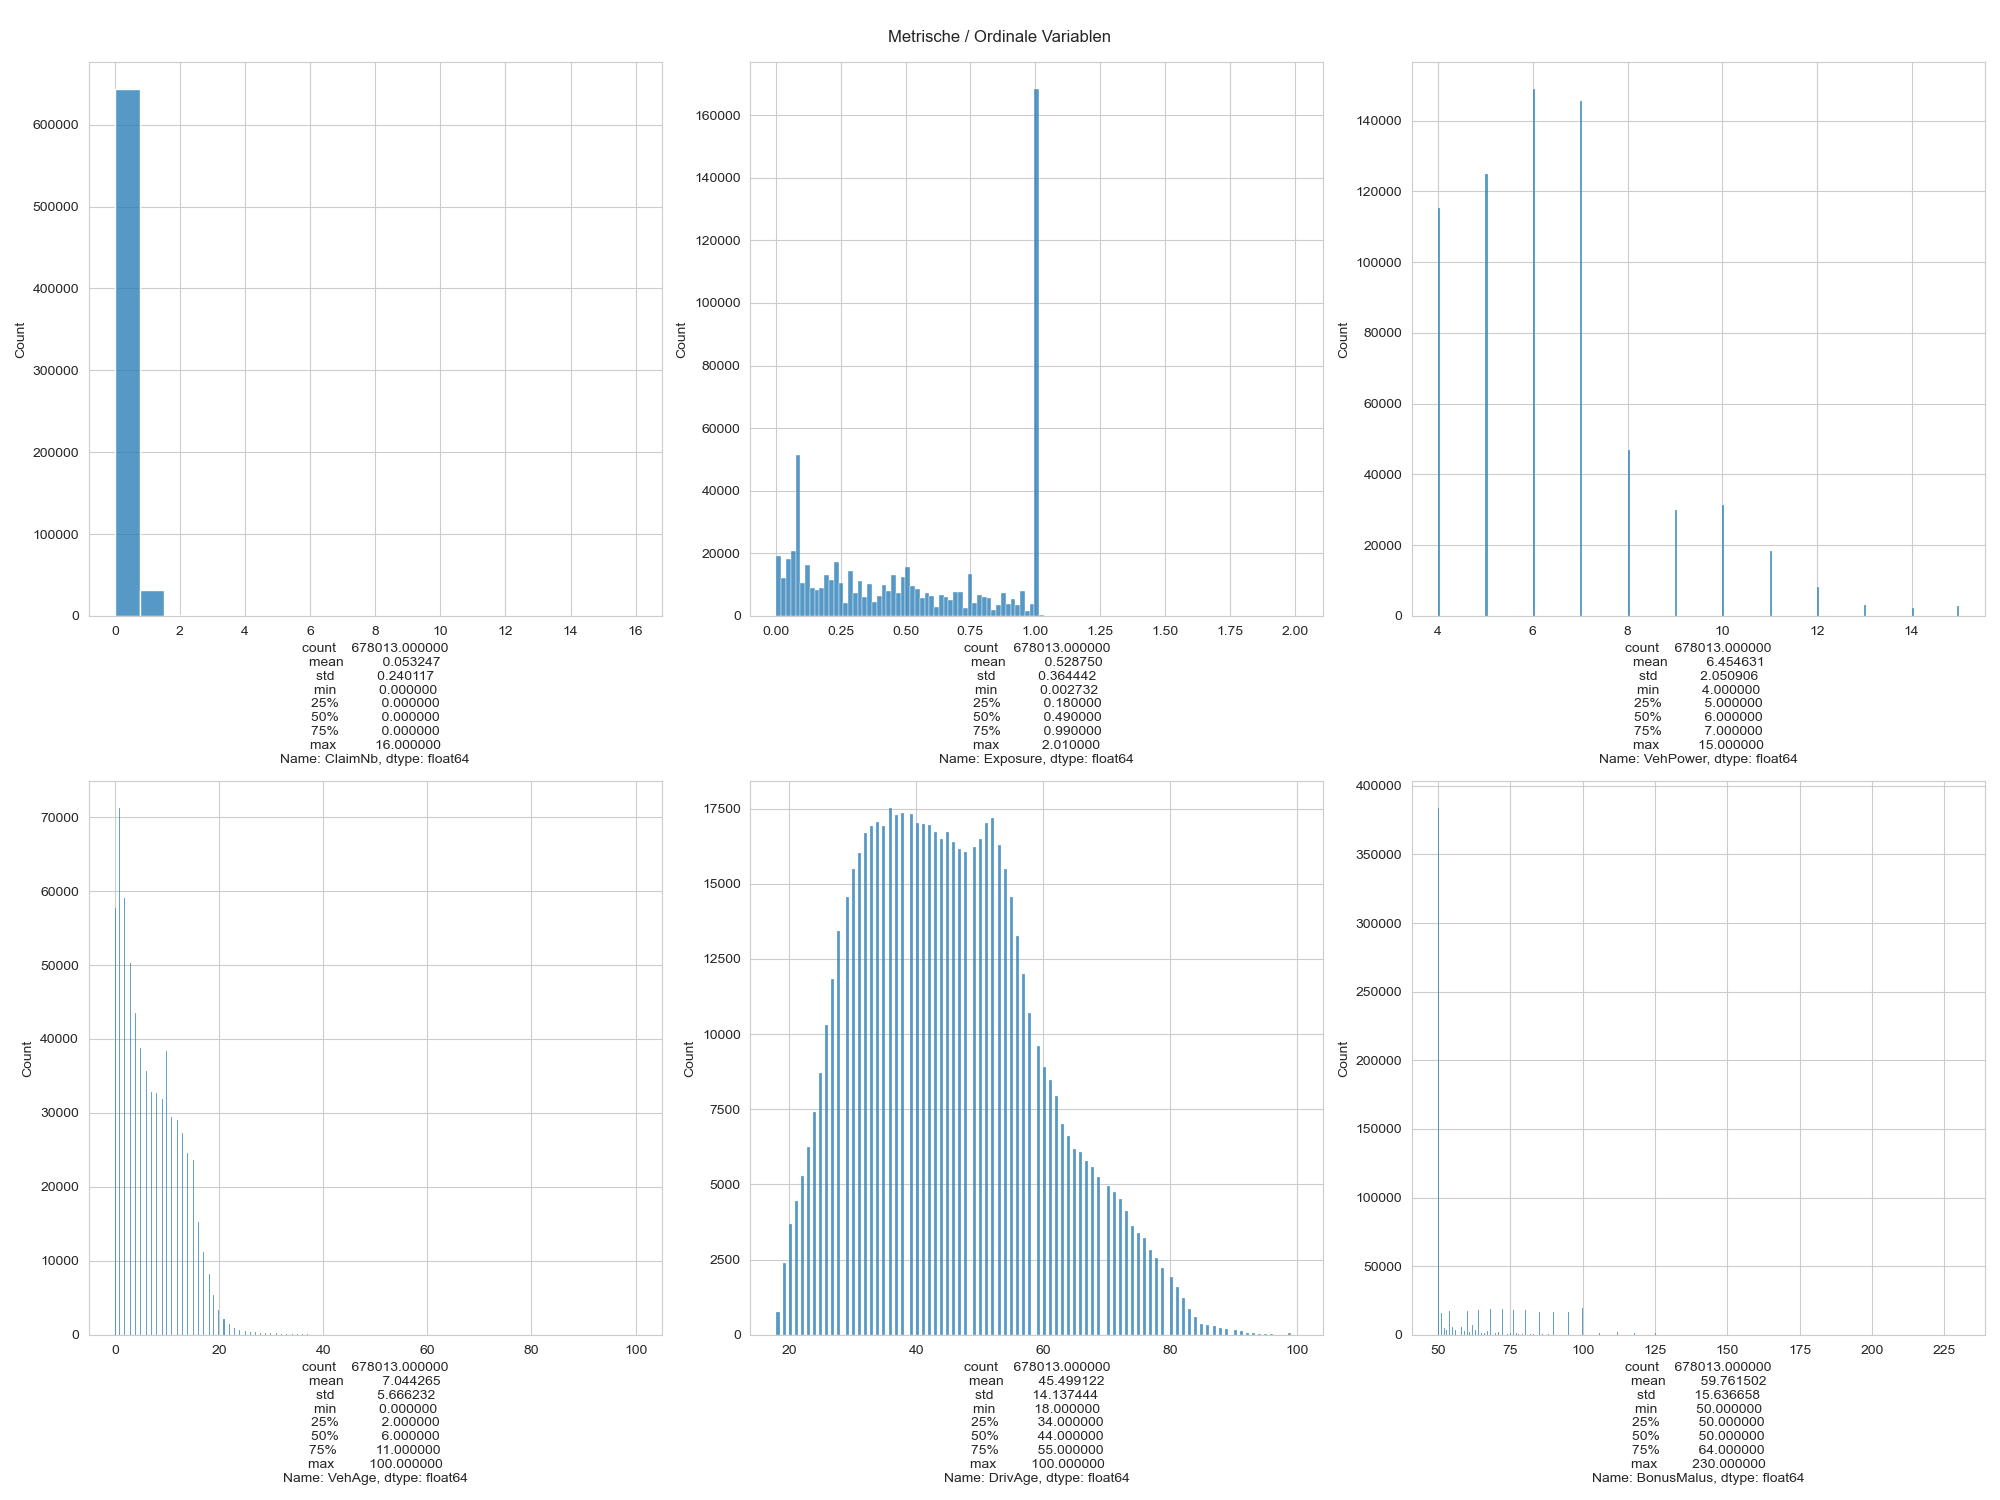

In [26]:
fig, ax = plt.subplots(2,3,figsize=(20,15))
for i, var in enumerate(['ClaimNb', 'Exposure', 'VehPower', 'VehAge', 'DrivAge', 'BonusMalus']):
    sns.histplot(data[var], ax = ax[i//3, i%3])
    ax[i//3, i%3].set_xlabel(str(data[var].describe()))
plt.suptitle("Metrische / Ordinale Variablen\n")
plt.tight_layout()
plt.show()

### Nominale Variablen:

### VehBrand:

<IPython.core.display.Javascript object>


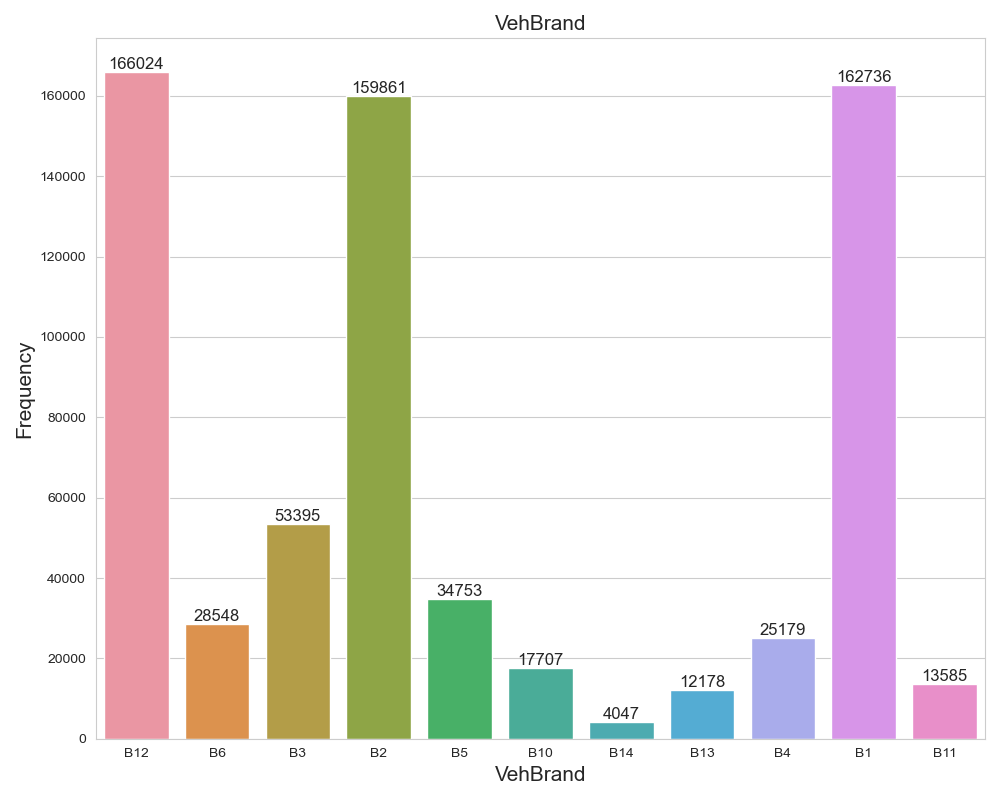

In [27]:
var_index = 0
var = "VehBrand"

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
freq = [(data[var] == el).sum() for el in data[var].unique()]
sns.barplot(x=data[var].unique(), y=freq, ax=ax)

# Add frequency as text above each bar with increased font size
for i, v in enumerate(freq):
    ax.text(i, v + 0.01, str(v), ha='center', va='bottom', fontsize=12)

ax.set_xlabel(var, fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)
plt.title(var, fontsize=15)

plt.tight_layout()
plt.show()


In [32]:
data[var].describe()

count     678013
unique        11
top          B12
freq      166024
Name: VehBrand, dtype: object

### VehGas:

<IPython.core.display.Javascript object>


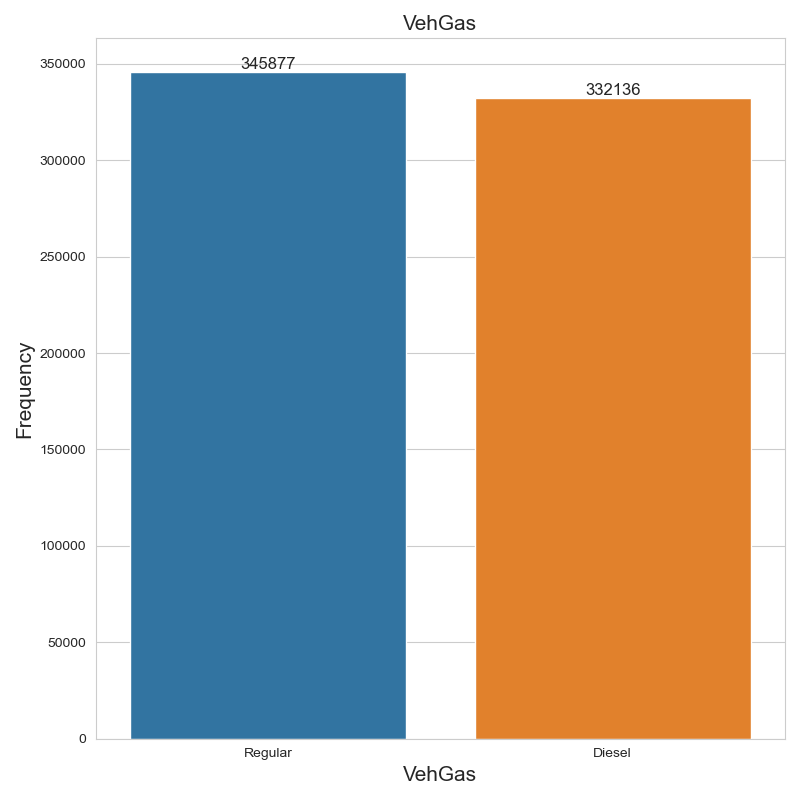

In [33]:
var_index = 0
var = "VehGas"

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
freq = [(data[var] == el).sum() for el in data[var].unique()]
sns.barplot(x=data[var].unique(), y=freq, ax=ax)

# Add frequency as text above each bar with increased font size
for i, v in enumerate(freq):
    ax.text(i, v + 0.01, str(v), ha='center', va='bottom', fontsize=12)

ax.set_xlabel(var, fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)
plt.title(var, fontsize=15)

plt.tight_layout()
plt.show()


In [34]:
data[var].describe()

count      678013
unique          2
top       Regular
freq       345877
Name: VehGas, dtype: object

### Overview:

<IPython.core.display.Javascript object>


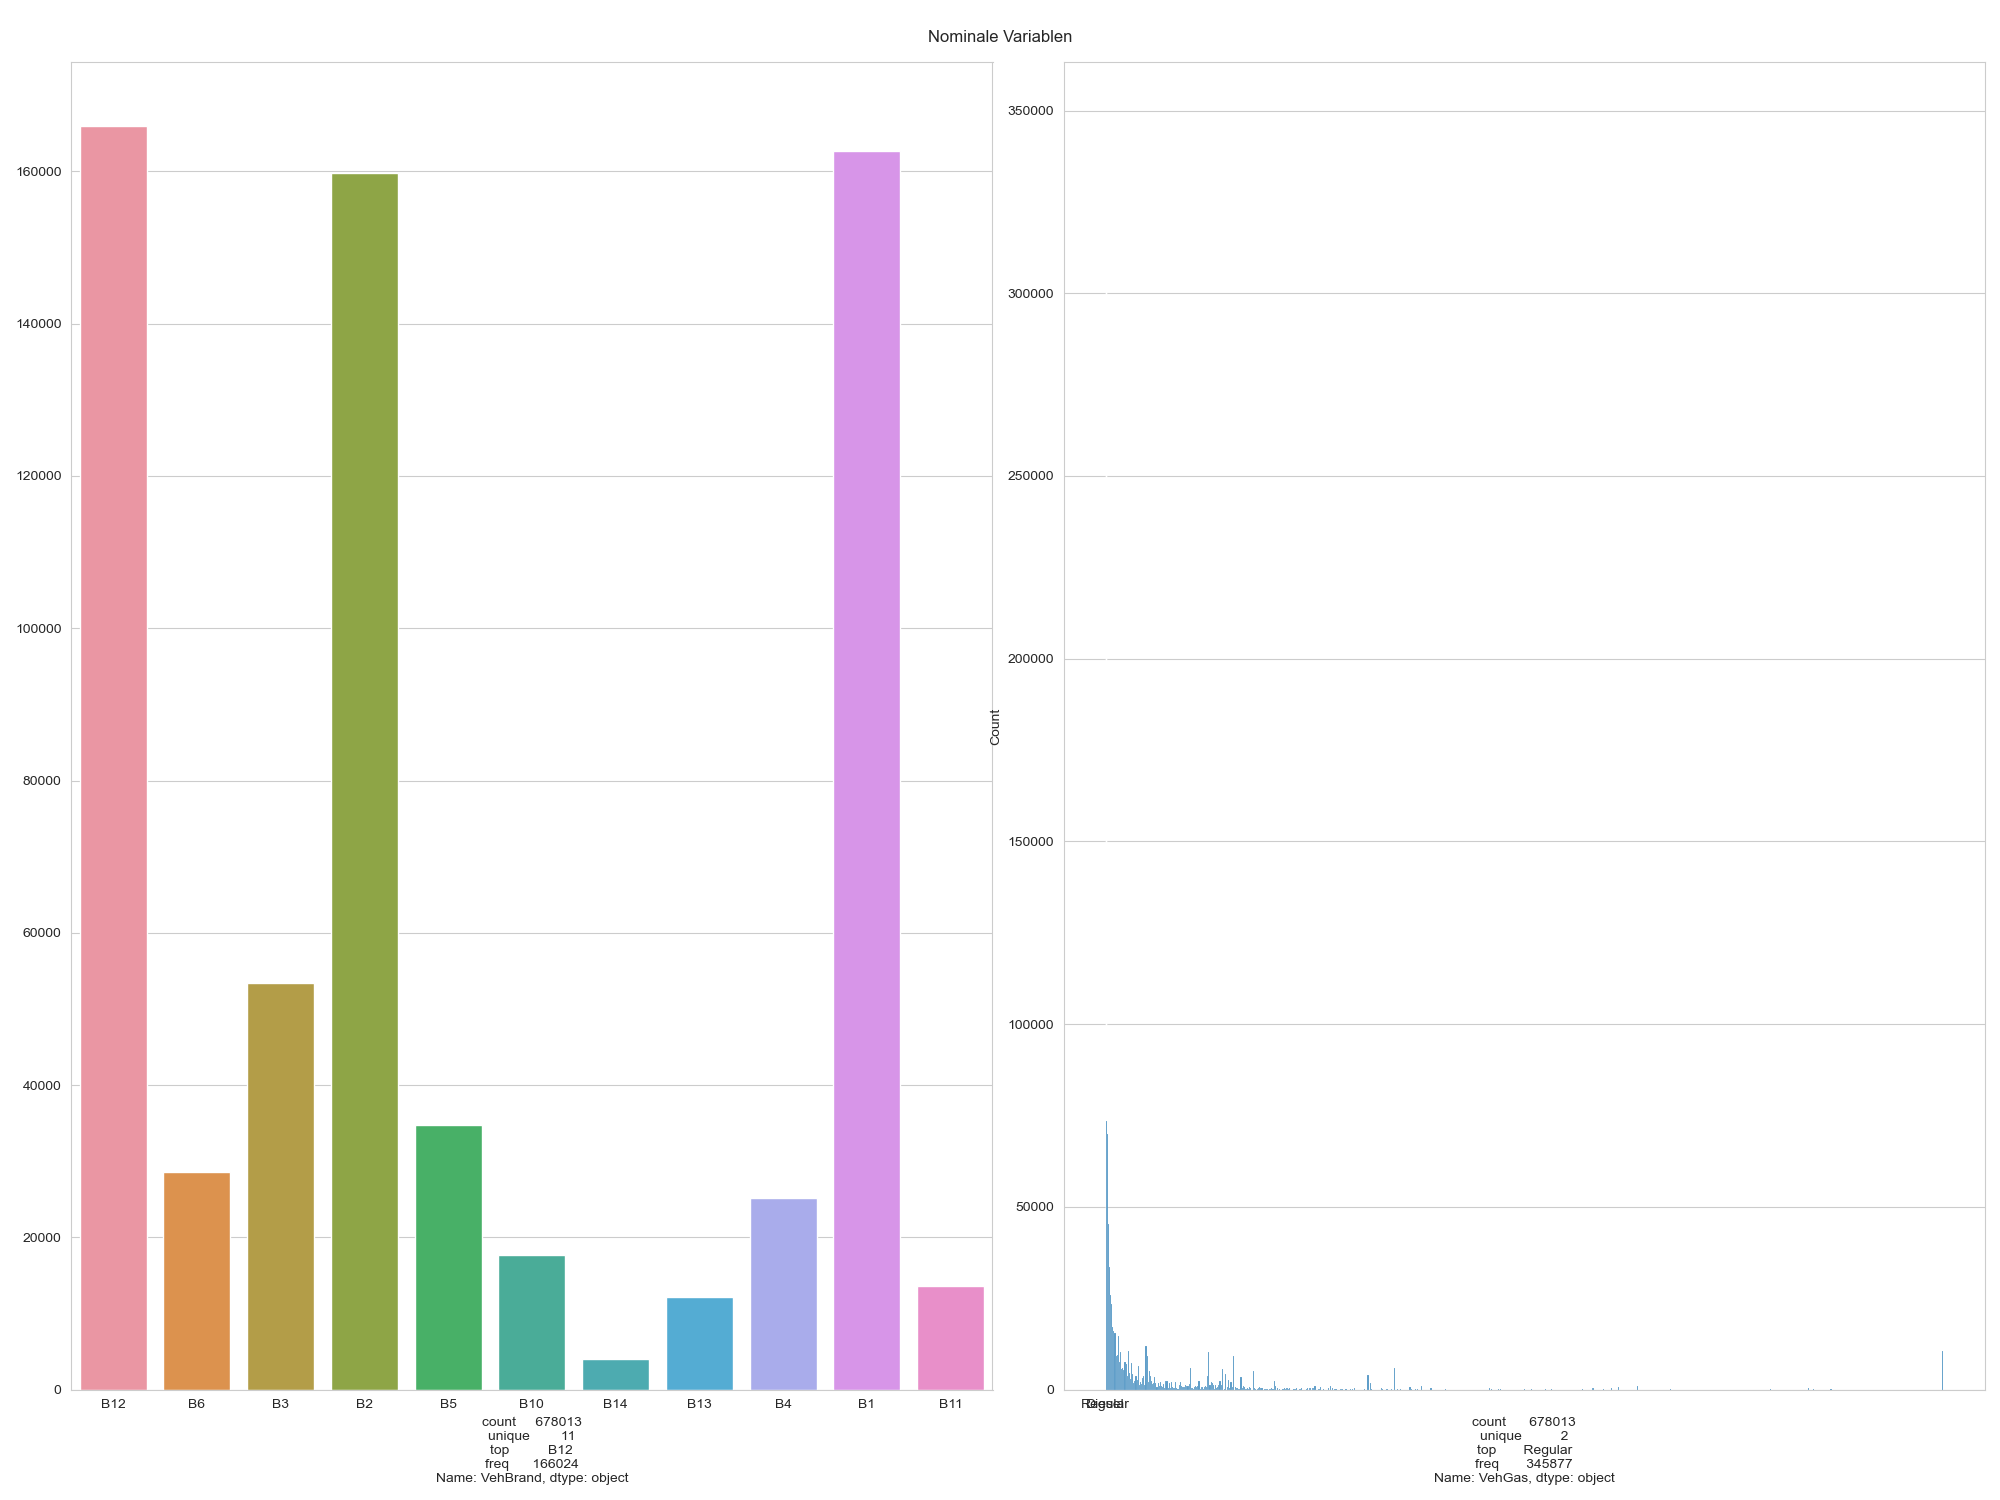

In [35]:
fig, ax = plt.subplots(1,2,figsize=(20,15))
for i, var in enumerate(['VehBrand', 'VehGas']):
    freq = [(data[var]==el).sum() for el in data[var].unique()]
    sns.barplot(x = data[var].unique(), y=freq, ax = ax[i])
    ax[i].set_xlabel(str(data[var].describe()))
plt.suptitle("Nominale Variablen\n")
plt.tight_layout()
plt.show()

### Geographic Variables: Area, Region, Density

#### Region:
Regions according to 1970-2015 classification scheme

In [56]:
data['Region'].unique()

array(['R82', 'R22', 'R72', 'R31', 'R91', 'R52', 'R93', 'R11', 'R24',
       'R94', 'R83', 'R54', 'R26', 'R53', 'R73', 'R42', 'R25', 'R21',
       'R41', 'R43', 'R74', 'R23'], dtype=object)

In [57]:
def map_code_to_region(code):
    iso_3166_2_fr = {
        "01": "Ain",
        "02": "Aisne",
        "03": "Allier",
        "04": "Alpes-de-Haute-Provence",
        "05": "Hautes-Alpes",
        "06": "Alpes-Maritimes",
        "07": "Ardèche",
        "08": "Ardennes",
        "09": "Ariège",
        "10": "Aube",
        "11": "Aude",
        "12": "Aveyron",
        "13": "Bouches-du-Rhône",
        "14": "Calvados",
        "15": "Cantal",
        "16": "Charente",
        "17": "Charente-Maritime",
        "18": "Cher",
        "19": "Corrèze",
        "2A": "Corse-du-Sud",
        "2B": "Haute-Corse",
        "21": "Côte-d'Or",
        "22": "Côtes-d'Armor",
        "23": "Creuse",
        "24": "Dordogne",
        "25": "Doubs",
        "26": "Drôme",
        "27": "Eure",
        "28": "Eure-et-Loir",
        "29": "Finistère",
        "30": "Gard",
        "31": "Haute-Garonne",
        "32": "Gers",
        "33": "Gironde",
        "34": "Hérault",
        "35": "Ille-et-Vilaine",
        "36": "Indre",
        "37": "Indre-et-Loire",
        "38": "Isère",
        "39": "Jura",
        "40": "Landes",
        "41": "Loir-et-Cher",
        "42": "Loire",
        "43": "Haute-Loire",
        "44": "Loire-Atlantique",
        "45": "Loiret",
        "46": "Lot",
        "47": "Lot-et-Garonne",
        "48": "Lozère",
        "49": "Maine-et-Loire",
        "50": "Manche",
        "51": "Marne",
        "52": "Haute-Marne",
        "53": "Mayenne",
        "54": "Meurthe-et-Moselle",
        "55": "Meuse",
        "56": "Morbihan",
        "57": "Moselle",
        "58": "Nièvre",
        "59": "Nord",
        "60": "Oise",
        "61": "Orne",
        "62": "Pas-de-Calais",
        "63": "Puy-de-Dôme",
        "64": "Pyrénées-Atlantiques",
        "65": "Hautes-Pyrénées",
        "66": "Pyrénées-Orientales",
        "67": "Bas-Rhin",
        "68": "Haut-Rhin",
        "69": "Rhône",
        "70": "Haute-Saône",
        "71": "Saône-et-Loire",
        "72": "Sarthe",
        "73": "Savoie",
        "74": "Haute-Savoie",
        "75": "Paris",
        "76": "Seine-Maritime",
        "77": "Seine-et-Marne",
        "78": "Yvelines",
        "79": "Deux-Sèvres",
        "80": "Somme",
        "81": "Tarn",
        "82": "Tarn-et-Garonne",
        "83": "Var",
        "84": "Vaucluse",
        "85": "Vendée",
        "86": "Vienne",
        "87": "Haute-Vienne",
        "88": "Vosges",
        "89": "Yonne",
        "90": "Territoire de Belfort",
        "91": "Essonne",
        "92": "Hauts-de-Seine",
        "93": "Seine-Saint-Denis",
        "94": "Val-de-Marne",
        "95": "Val-d'Oise",
        "971": "Guadeloupe",
        "972": "Martinique",
        "973": "Guyane",
        "974": "La Réunion",
        "976": "Mayotte",
    }

    region = iso_3166_2_fr.get(code)
    if region is not None:
        return region
    else:
        return "Region not found"

In [69]:
for reg in data['Region'].unique():
    print("Region %s: %s"%(reg,map_code_to_region(reg.replace("R",""))))
    print("%%policies: %f"%(data['Region']==reg).mean().round(4))
    print("\n")

Region R82: Tarn-et-Garonne
%policies: 0.125000


Region R22: Côtes-d'Armor
%policies: 0.011800


Region R72: Sarthe
%policies: 0.046200


Region R31: Haute-Garonne
%policies: 0.040200


Region R91: Essonne
%policies: 0.052800


Region R52: Haute-Marne
%policies: 0.057200


Region R93: Seine-Saint-Denis
%policies: 0.117000


Region R11: Aude
%policies: 0.102900


Region R24: Dordogne
%policies: 0.236900


Region R94: Val-de-Marne
%policies: 0.006700


Region R83: Var
%policies: 0.007800


Region R54: Meurthe-et-Moselle
%policies: 0.028100


Region R26: Drôme
%policies: 0.015500


Region R53: Mayenne
%policies: 0.062100


Region R73: Savoie
%policies: 0.025300


Region R42: Loire
%policies: 0.003200


Region R25: Doubs
%policies: 0.016100


Region R21: Côte-d'Or
%policies: 0.004500


Region R41: Loir-et-Cher
%policies: 0.019200


Region R43: Haute-Loire
%policies: 0.002000


Region R74: Haute-Savoie
%policies: 0.006700


Region R23: Creuse
%policies: 0.013000




#### Density:

<IPython.core.display.Javascript object>


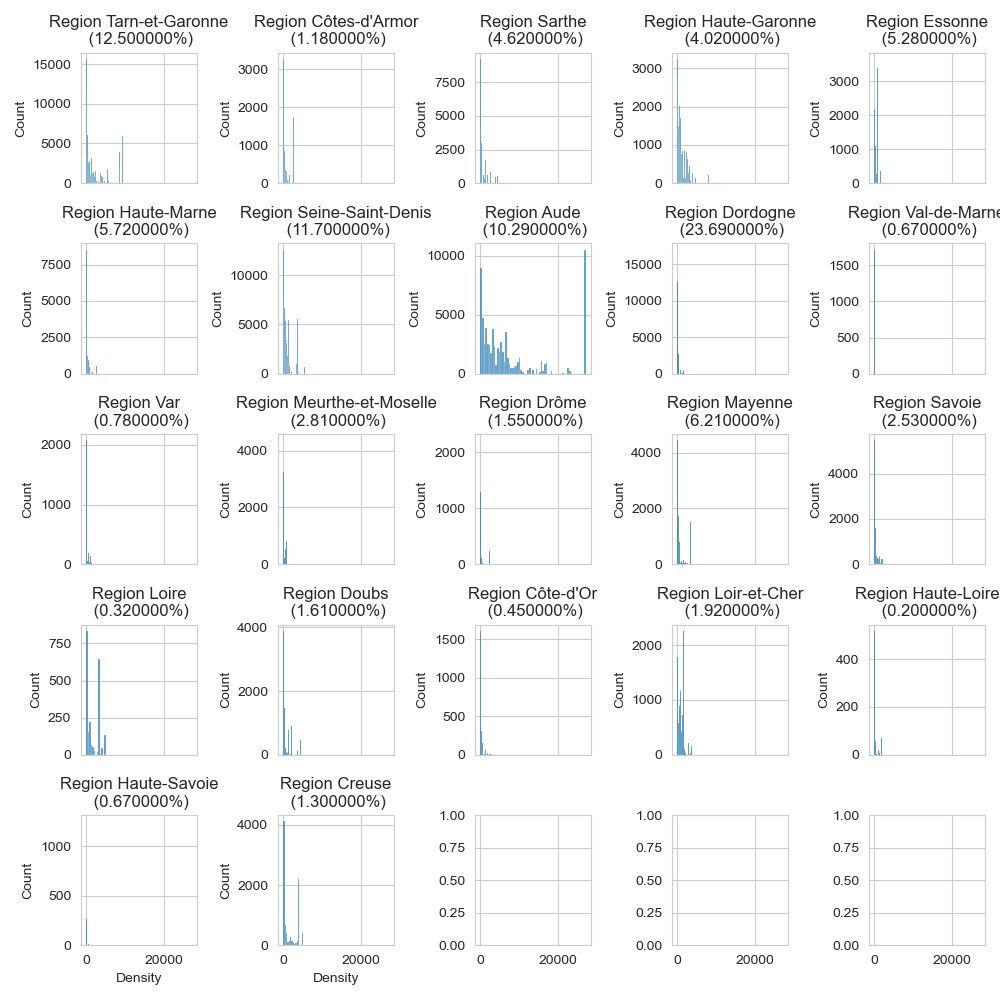

In [87]:
fig, ax = plt.subplots(5,5,sharex = True, figsize = (10,10))

for i, reg in enumerate(data['Region'].unique()):
    sns.histplot(data = data[data['Region']==reg], x = 'Density', ax = ax[i//5, i%5])
    ax[i//5, i%5].set_title("Region %s\n (%f%%)"%(map_code_to_region(reg.replace("R","")), ((data['Region']==reg).mean()*100).round(2)))

plt.tight_layout()
plt.show()

#### Area:

<IPython.core.display.Javascript object>


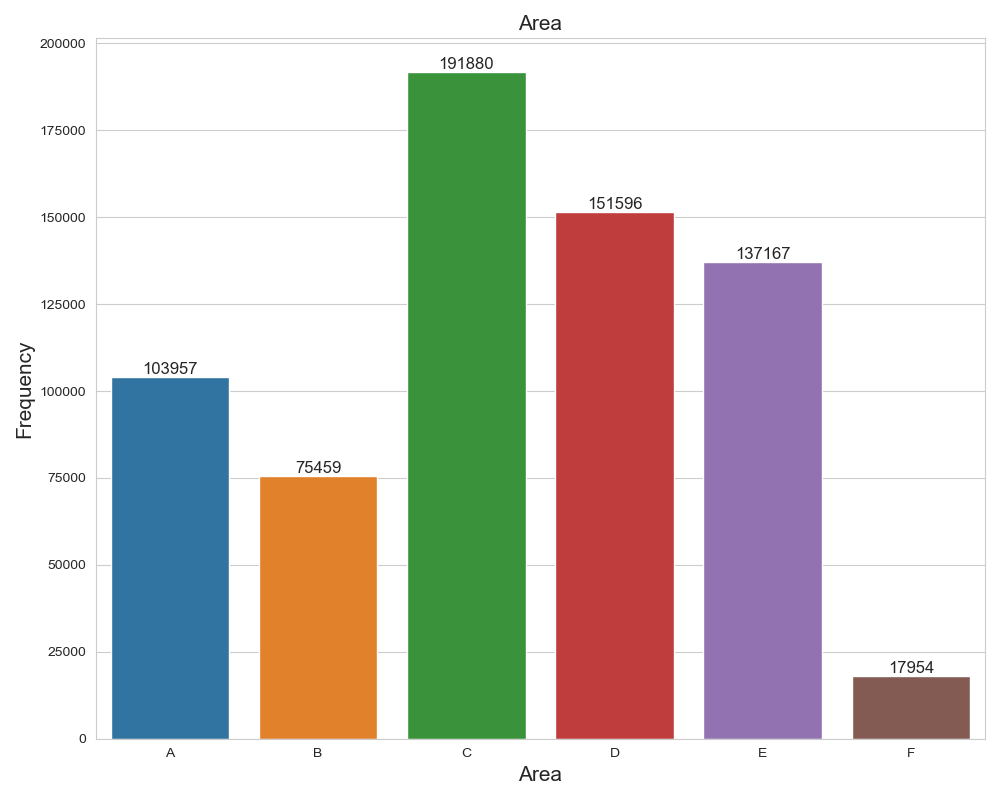

In [92]:
var_index = 0
var = "Area"

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
freq = [(data[var] == el).sum() for el in ["A","B","C","D","E","F"]]
sns.barplot(x=["A","B","C","D","E","F"], y=freq, ax=ax)

# Add frequency as text above each bar with increased font size
for i, v in enumerate(freq):
    ax.text(i, v + 0.01, str(v), ha='center', va='bottom', fontsize=12)

ax.set_xlabel(var, fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)
plt.title(var, fontsize=15)

plt.tight_layout()
plt.show()


In [94]:
data['Area'].describe()

count     678013
unique         6
top            C
freq      191880
Name: Area, dtype: object

## Variable "ClaimAmount":

<IPython.core.display.Javascript object>


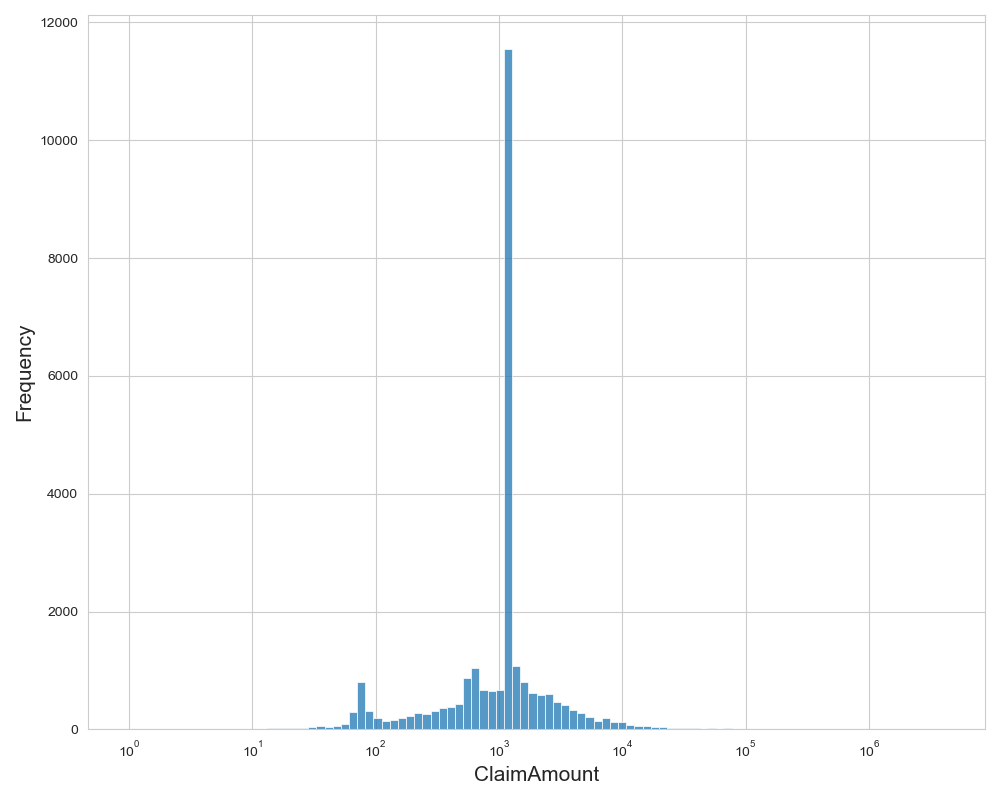

count    2.663900e+04
mean     2.278536e+03
std      2.929748e+04
min      1.000000e+00
25%      6.868100e+02
50%      1.172000e+03
75%      1.228080e+03
max      4.075401e+06
Name: ClaimAmount, dtype: float64


In [112]:
var = "ClaimAmount"

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.set_xscale('log')
sns.histplot(costs[var], ax=ax, bins = 100)

# Increase font size for x-axis label and title
ax.set_xlabel(var, fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)
#plt.title(var_list[var_index], fontsize=15)

plt.tight_layout()
plt.show()

print(costs[var].describe())

In [119]:
costs['ClaimAmount'].mode()[0]

1204.0

In [121]:
((costs['ClaimAmount']-costs['ClaimAmount'].mode()[0]).abs()<10**(-10)).mean()

0.1798866323810954

In [126]:
((costs['ClaimAmount']-costs['ClaimAmount'].mode()[0]).abs()<=10**(2)).mean()

0.4377791959157626

# Data Cleaning:

In [2]:
data = pd.read_csv("freMTPL2freq.csv")
costs = pd.read_csv("freMTPL2sev.csv")

Delete all *IDpol* that are contained in *costs* but not in *data* due to missing risk variables:

In [3]:
# IDs in contained in both dataframes are stored in "merged_costs":
merged_costs = pd.merge(costs, data[['IDpol']], on='IDpol', how='inner')
# Drop all indices contained in "costs" but not in "merged_costs":
drop_indices = costs.index[~costs.index.isin(merged_costs.index)].tolist()
costs.drop(drop_indices, inplace=True)

print("Number of rows deleted in costs: %i"%len(drop_indices))

Number of rows deleted in costs: 195


Problem: For some policies, the number of entries in *costs* differs from the the number of corresponding entries in *data*:

In [4]:
data['temp'] = data['IDpol'].apply(lambda x: (costs['IDpol'] == x).sum())
drop_index = data[data['temp'] != data['ClaimNb']].index


In [5]:
len(drop_index)/(data['ClaimNb']>0).sum()

0.27263652378156195

In about 27.26% of all contracts with *ClaimNb* > 0, there are fewer entries in *costs* than *ClaimNb* suggests in *data*. Absolute number of missing entries:

In [6]:
diffs = (data['temp'] - data['ClaimNb'])[data['temp'] != data['ClaimNb']]
diffs = diffs.value_counts().sort_values()
print(diffs)

-11       1
-6        1
-4        2
-9        2
-3       20
-2      489
-1     8771
dtype: int64


Relative Share of missing entries:

In [7]:
diffs = ((data['temp'] - data['ClaimNb'])/data['ClaimNb'])[data['temp'] != data['ClaimNb']]
diffs_count = diffs.value_counts().sort_values()
print(diffs_count)

-0.125000       1
-0.666667       1
-0.818182       2
-0.500000       3
-1.000000    9279
dtype: int64


In [8]:
9279/diffs_count.sum()

0.9992461770407064

In 99.9% of those cases, an entry in *costs* is missing completely.

### Replace missing values with the claim value of k-nearest neighbors:
First, assign all *ClaimAmounts* available in *costs* to the dataframe *data*:

In [9]:
data_claims = data[data['ClaimNb']>0].copy()

In [10]:
claim_amount = []
for ids in tqdm.tqdm(data_claims['IDpol']):
    
    indices = costs['IDpol'] == ids
    if not (indices).sum() == data_claims[data_claims['IDpol'] == ids]['ClaimNb'].values[0]:
        claim_amount.append(np.nan)
    else:
        claim_amount.append(costs[indices]['ClaimAmount'].sum())
        

100%|███████████████████████████████████| 34060/34060 [00:32<00:00, 1054.77it/s]


In [11]:
data_claims.loc[:, 'ClaimAmount'] = claim_amount

In [12]:
data_claims['ClaimAmount'].describe()

count    2.477400e+04
mean     2.404731e+03
std      3.036709e+04
min      1.000000e+00
25%      7.498400e+02
50%      1.172000e+03
75%      1.337477e+03
max      4.075401e+06
Name: ClaimAmount, dtype: float64

A k-nearest neighbors approach should now determine the closest neighbours to those contracts that do not have a *ClaimAmount* (given the **metric** variables in the dataset!). <font color=red>IMPORTANT: Normalize every metric feature to ensure that each feature receives the same weight! </font>


In [13]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [14]:
metric_cols = ['Exposure', 'VehAge', 'DrivAge', 'BonusMalus', 'Density']

In [15]:
scaler = StandardScaler()
input_values = data_claims[metric_cols + ['ClaimAmount']].copy()
input_values[metric_cols] = scaler.fit_transform(input_values[metric_cols])

In [16]:
input_values

Exposure    VehAge   DrivAge  BonusMalus   Density  ClaimAmount
0      -1.584392 -1.215186  0.589977   -0.690437 -0.176389          NaN
1       0.372386 -1.215186  0.589977   -0.690437 -0.176389          NaN
2       0.313975 -0.841428  0.387862   -0.690437 -0.450030          NaN
3      -1.613598 -1.215186 -0.016368   -0.690437 -0.444854          NaN
4       0.576826 -1.215186 -0.016368   -0.690437 -0.444854          NaN
...          ...       ...       ...         ...       ...          ...
677203 -1.350747 -1.028307 -1.363802   -0.163295 -0.389561      1324.40
677475 -1.467570 -0.841428  0.320490   -0.690437 -0.420854      1769.88
677499 -1.379953 -1.215186 -0.757457   -0.637722 -0.058274      1288.28
677516 -1.379953 -0.654549 -0.690085   -0.690437 -0.420148     12230.40
677653 -1.496775  0.653605 -0.487970   -0.690437 -0.269799      1452.00

[34060 rows x 6 columns]

In [17]:
# Create KNN imputer
knn_imputer = KNNImputer(n_neighbors=3, weights = 'distance')

In [18]:
# Apply the pipeline to your DataFrame
imputed_data = knn_imputer.fit_transform(input_values)

In [19]:
# Add results to data_claims:
data_claims['ClaimAmount'] = imputed_data[:,-1:]

In [20]:
data_claims

IDpol  ClaimNb  Exposure Area  VehPower  VehAge  DrivAge  \
0             1.0        1      0.10    D         5       0       55   
1             3.0        1      0.77    D         5       0       55   
2             5.0        1      0.75    B         6       2       52   
3            10.0        1      0.09    B         7       0       46   
4            11.0        1      0.84    B         7       0       46   
...           ...      ...       ...  ...       ...     ...      ...   
677203  6113521.0        1      0.18    C         4       1       26   
677475  6113793.0        1      0.14    C         7       2       51   
677499  6113817.0        1      0.17    D         4       0       35   
677516  6113834.0        2      0.17    C        15       3       36   
677653  6113971.0        1      0.13    D         7      10       39   

        BonusMalus VehBrand   VehGas  Density Region  temp   ClaimAmount  
0               50      B12  Regular     1217    R82     0    641.275226  
1               50      B12  Regular     1217    R82     0   2376.622277  
2               50      B12   Diesel       54    R22     0   4854.693716  
3               50      B12   Diesel       76    R72     0    660.752377  
4               50      B12   Diesel       76    R72     0   1128.120000  
...            ...      ...      ...      ...    ...   ...           ...  
677203          60      B12   Diesel      311    R82     1   1324.400000  
677475          50      B12   Diesel      178    R72     1   1769.880000  
677499          51      B12  Regular     1719    R82     1   1288.280000  
677516          50      B12  Regular      181    R54     2  12230.400000  
677653          50       B4  Regular      820    R41     1   1452.000000  

[34060 rows x 14 columns]

In [21]:
data_claims['ClaimAmount'].describe()

count    3.406000e+04
mean     2.426296e+03
std      2.684692e+04
min      1.000000e+00
25%      8.435533e+02
50%      1.172000e+03
75%      1.522474e+03
max      4.075401e+06
Name: ClaimAmount, dtype: float64

Merge data_claims to data_complete and save this dataframe as a csv file:

In [22]:
data_complete = pd.merge(data.drop(columns=['temp']), data_claims[['IDpol', 'ClaimAmount']], on = 'IDpol', how = 'outer')

In [23]:
data_complete['ClaimAmount'] = data_complete['ClaimAmount'].fillna(0.0)

Add the target variable $\frac{ClaimAmount}{Exposure}$ to the dataframe:

In [24]:
data_complete['target'] = data_complete['ClaimAmount']/data_complete['Exposure']

In [25]:
data_complete

IDpol  ClaimNb  Exposure Area  VehPower  VehAge  DrivAge  \
0             1.0        1   0.10000    D         5       0       55   
1             3.0        1   0.77000    D         5       0       55   
2             5.0        1   0.75000    B         6       2       52   
3            10.0        1   0.09000    B         7       0       46   
4            11.0        1   0.84000    B         7       0       46   
...           ...      ...       ...  ...       ...     ...      ...   
678008  6114326.0        0   0.00274    E         4       0       54   
678009  6114327.0        0   0.00274    E         4       0       41   
678010  6114328.0        0   0.00274    D         6       2       45   
678011  6114329.0        0   0.00274    B         4       0       60   
678012  6114330.0        0   0.00274    B         7       6       29   

        BonusMalus VehBrand   VehGas  Density Region  ClaimAmount       target  
0               50      B12  Regular     1217    R82   641.275226  6412.752259  
1               50      B12  Regular     1217    R82  2376.622277  3086.522437  
2               50      B12   Diesel       54    R22  4854.693716  6472.924955  
3               50      B12   Diesel       76    R72   660.752377  7341.693073  
4               50      B12   Diesel       76    R72  1128.120000  1343.000000  
...            ...      ...      ...      ...    ...          ...          ...  
678008          50      B12  Regular     3317    R93     0.000000     0.000000  
678009          95      B12  Regular     9850    R11     0.000000     0.000000  
678010          50      B12   Diesel     1323    R82     0.000000     0.000000  
678011          50      B12  Regular       95    R26     0.000000     0.000000  
678012          54      B12   Diesel       65    R72     0.000000     0.000000  

[678013 rows x 14 columns]

In [26]:
#data_complete.to_csv("./data_complete.csv")

#### Split to train and test data:
Split *data_complete* in a ratio of 90%-10% for training/test dataset.

In [27]:
np.random.seed(123)
index_train = np.random.choice(data_complete.shape[0], size = int(np.ceil(data_complete.shape[0]*0.9)), replace = False)

In [28]:
index_test = np.setdiff1d(np.arange(data_complete.shape[0]), index_train)

In [951]:
#data_complete.iloc[index_train].reset_index().to_csv("./data_train.csv")

In [952]:
#data_complete.iloc[index_test].reset_index().to_csv("./data_test.csv")

# Dependency Plots:

In [2]:
data_complete = pd.read_csv("data_complete.csv", index_col=0)
data_complete

IDpol  ClaimNb  Exposure Area  VehPower  VehAge  DrivAge  \
0             1.0        1   0.10000    D         5       0       55   
1             3.0        1   0.77000    D         5       0       55   
2             5.0        1   0.75000    B         6       2       52   
3            10.0        1   0.09000    B         7       0       46   
4            11.0        1   0.84000    B         7       0       46   
...           ...      ...       ...  ...       ...     ...      ...   
678008  6114326.0        0   0.00274    E         4       0       54   
678009  6114327.0        0   0.00274    E         4       0       41   
678010  6114328.0        0   0.00274    D         6       2       45   
678011  6114329.0        0   0.00274    B         4       0       60   
678012  6114330.0        0   0.00274    B         7       6       29   

        BonusMalus VehBrand   VehGas  Density Region  ClaimAmount       target  
0               50      B12  Regular     1217    R82   641.275226  6412.752259  
1               50      B12  Regular     1217    R82  2376.622277  3086.522437  
2               50      B12   Diesel       54    R22  4854.693716  6472.924955  
3               50      B12   Diesel       76    R72   660.752377  7341.693073  
4               50      B12   Diesel       76    R72  1128.120000  1343.000000  
...            ...      ...      ...      ...    ...          ...          ...  
678008          50      B12  Regular     3317    R93     0.000000     0.000000  
678009          95      B12  Regular     9850    R11     0.000000     0.000000  
678010          50      B12   Diesel     1323    R82     0.000000     0.000000  
678011          50      B12  Regular       95    R26     0.000000     0.000000  
678012          54      B12   Diesel       65    R72     0.000000     0.000000  

[678013 rows x 14 columns]

<IPython.core.display.Javascript object>


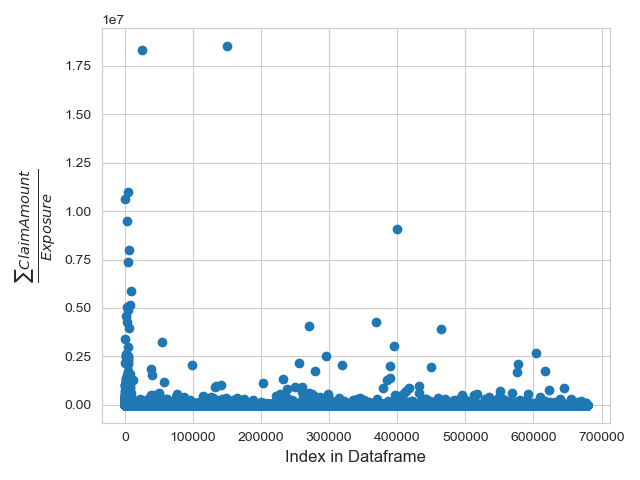

In [609]:
plt.figure()
plt.scatter(np.arange(data_complete.shape[0]), data_complete['target'])
plt.xlabel("Index in Dataframe", fontsize = 12)
plt.ylabel(r"$\frac{\sum ClaimAmount}{Exposure}$", fontsize = 15)
plt.tight_layout()
plt.show()

Reduce the influence of those outliers by taking the square root:

<IPython.core.display.Javascript object>


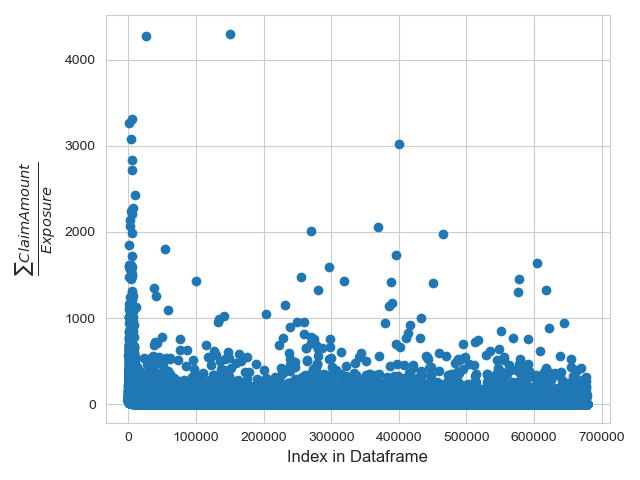

In [610]:
plt.figure()
plt.scatter(np.arange(data_complete.shape[0]), np.sqrt(data_complete['target']))
plt.xlabel("Index in Dataframe", fontsize = 12)
plt.ylabel(r"$\frac{\sum ClaimAmount}{Exposure}$", fontsize = 15)
plt.tight_layout()
plt.show()

## Outlier:

In [956]:
data_complete['target'].quantile(np.arange(0,1,step = 0.01).tolist() + [0.995])

0.000        0.000000
0.010        0.000000
0.020        0.000000
0.030        0.000000
0.040        0.000000
             ...     
0.960     1038.812215
0.970     1340.964400
0.980     2444.444444
0.990     6510.656174
0.995    15852.109888
Name: target, Length: 101, dtype: float64

In [957]:
data_complete['target'].max()

18524548.0

In [971]:
np.sqrt(data_complete['target']).quantile(np.arange(0,1,step = 0.01).tolist() + [0.995])

0.000      0.000000
0.010      0.000000
0.020      0.000000
0.030      0.000000
0.040      0.000000
            ...    
0.960     32.230610
0.970     36.619181
0.980     49.441323
0.990     80.688637
0.995    125.905162
Name: target, Length: 101, dtype: float64

In [972]:
np.sqrt(data_complete['target']).max()

4304.015334545174

In [973]:
data_complete['target_sqrt'] = np.sqrt(data_complete['target'])

## Correlation coefficients:
Calculate correlation coefficients between all variables:

In [30]:
# Conver ordinal var *VehPower* to a categorical one such that the Spearman corr
# coefficient can be computed directly:
data_complete['VehPower'] = data_complete['VehPower'].astype('category').astype('float')

#### Corr Coeff of the **metric/ordinal** variables:

In [31]:
correlation_matrix = data_complete.drop(columns = ['ClaimAmount', 'Exposure', 'ClaimNb', 'IDpol']).corr()

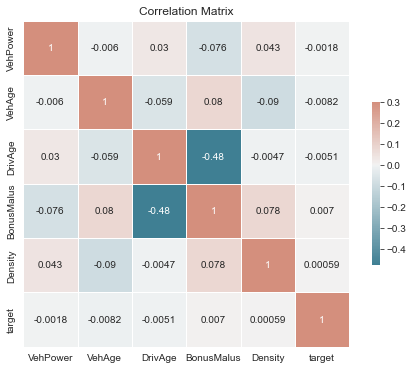

In [32]:
# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a custom diverging colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title("Correlation Matrix")
plt.show()

Strong negative correlation between *DrivAge* and *BonusMalus* since younger drivers were not able to gain bonuses due to the age restrictions.

<IPython.core.display.Javascript object>


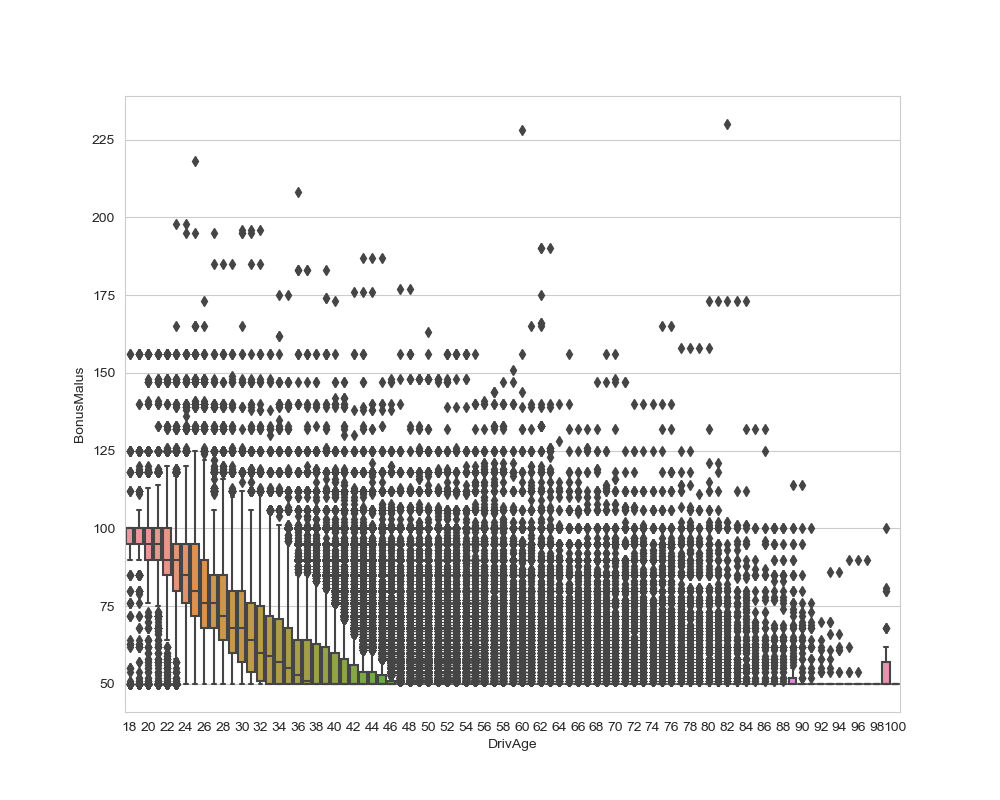

In [659]:
fig, ax = plt.subplots(1,1,figsize = (10,8))
sns.boxplot(data = data_complete, y= 'BonusMalus', x = 'DrivAge', ax = ax)

# Display only every second x-tick label
for i, label in enumerate(ax.get_xticklabels()):
    if i % 2 != 0:
        label.set_visible(False)

plt.show()

Due to the larger number of "outliers" in every age group, both variables will be retained in the dataset (despite the large negative correlation).

<IPython.core.display.Javascript object>


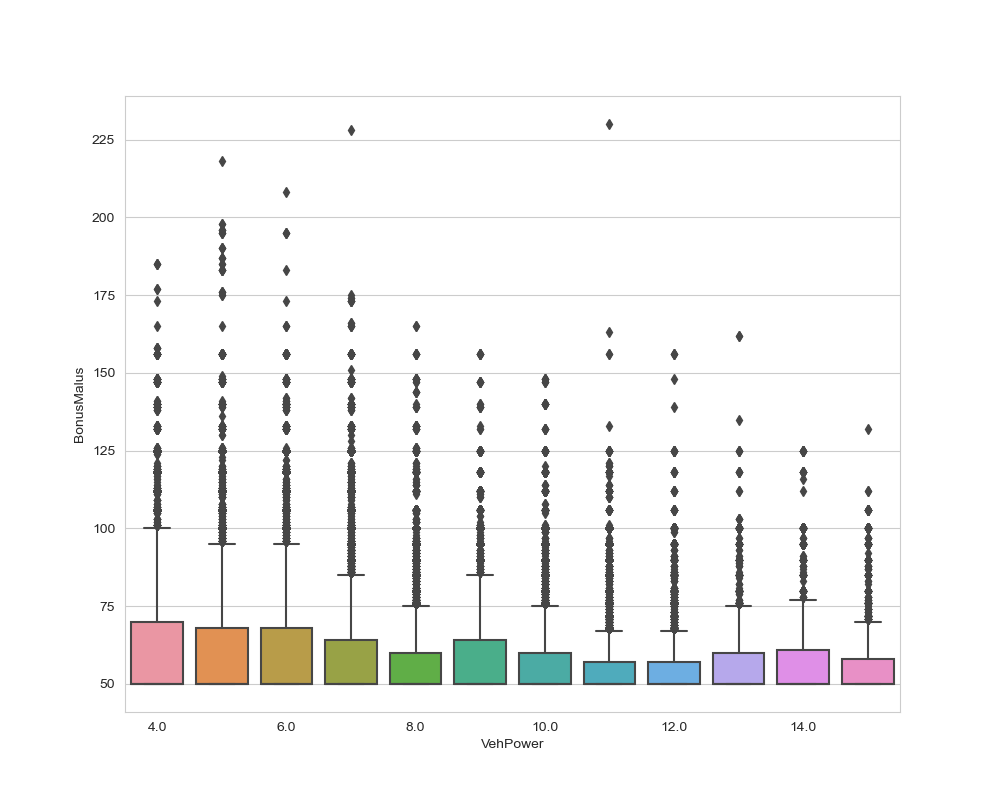

In [750]:
fig, ax = plt.subplots(1,1,figsize = (10,8))
sns.boxplot(data = data_complete, y= 'BonusMalus', x = 'VehPower', ax = ax)

# Display only every second x-tick label
for i, label in enumerate(ax.get_xticklabels()):
    if i % 2 != 0:
        label.set_visible(False)

plt.show()

#### Relationship between *target* and **nominal** variables:

<IPython.core.display.Javascript object>


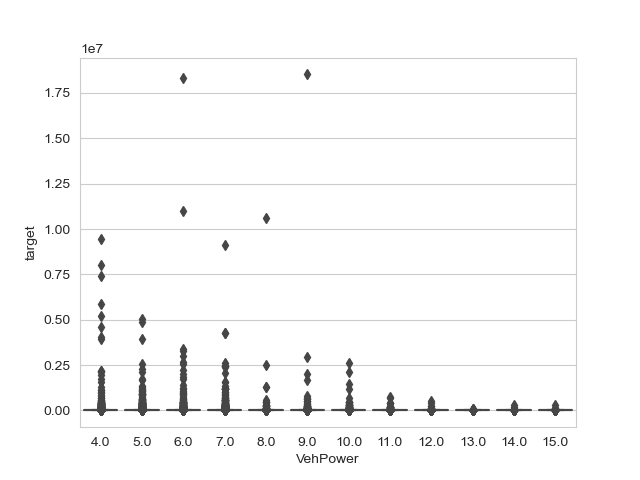

<IPython.core.display.Javascript object>


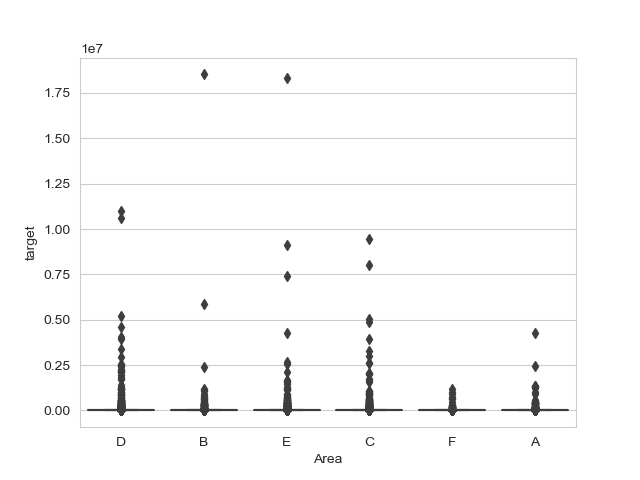

<IPython.core.display.Javascript object>


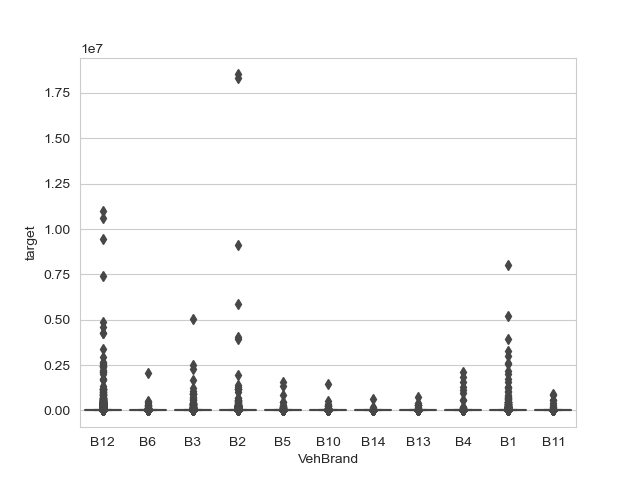

<IPython.core.display.Javascript object>


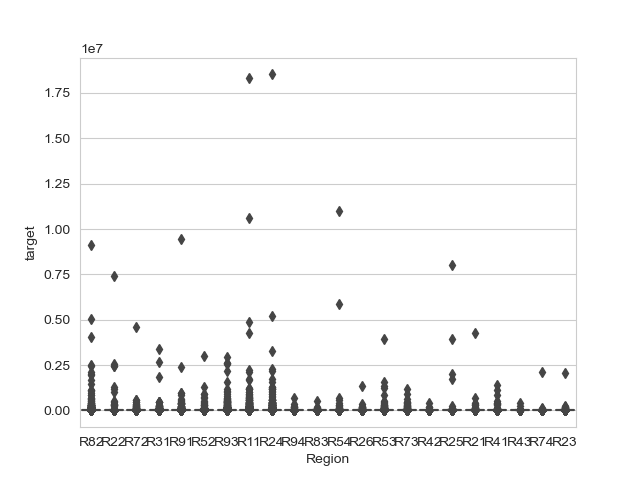

<IPython.core.display.Javascript object>


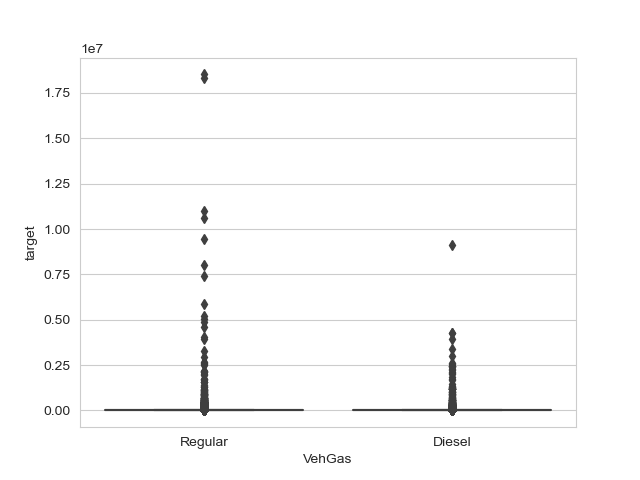

In [665]:
for nominal_var in ['VehPower', 'Area', 'VehBrand', 'Region', 'VehGas']:
    
    plt.figure()
    sns.boxplot(data = data_complete, y= 'target', x = nominal_var)
    plt.show()

It doesn't seem to be the case that *VehGas* has an significantly different influence on *target*. But the density plot and the distributions are different:

<IPython.core.display.Javascript object>


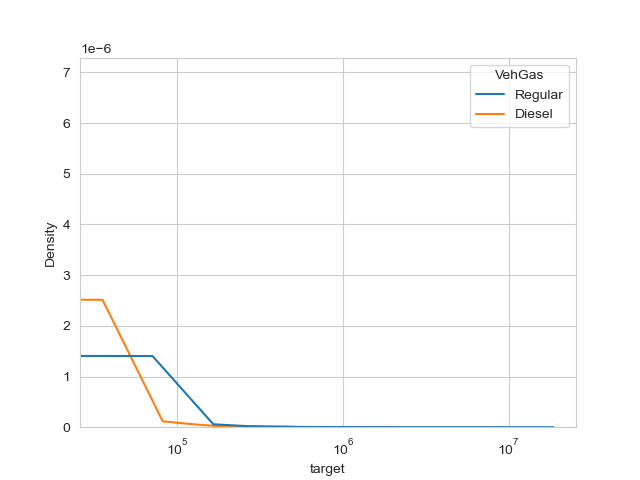

In [684]:
plt.figure()
sns.kdeplot(data = data_complete[data_complete['target']>0], x = 'target', hue = 'VehGas')
plt.xscale('log')
plt.show()

In [34]:
data_complete['target'][data_complete['VehGas'] == 'Regular'].describe()

count    3.458770e+05
mean     1.137159e+03
std      6.453299e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.852455e+07
Name: target, dtype: float64

In [35]:
data_complete['target'][data_complete['VehGas'] == 'Diesel'].describe()

count    3.321360e+05
mean     6.470053e+02
std      2.879004e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.102500e+06
Name: target, dtype: float64

### Issue of multicollinearity due to correlated geographic variables:

<font color='red'>Very high correlation between *Area* and *Density* $\Longrightarrow$ Exluding *Area* from analysis to avoid multicollinearity</font> (Although *Area* is nominal and not ordinal: If you assume that A to F corresponds with an increasing rank, the Spearman rank correlation coefficient can be calculated.)

<IPython.core.display.Javascript object>


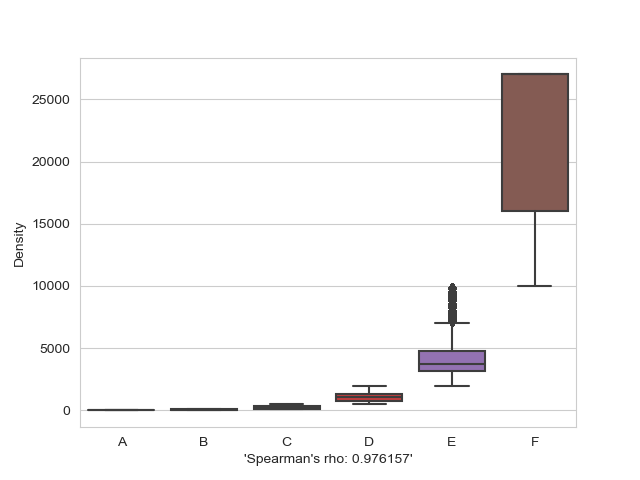

In [653]:
plt.figure()
sns.boxplot(data = data_complete, y= 'Density', x = 'Area', order=['A','B','C','D','E','F'])
plt.xlabel("'Spearman's rho: %f'"%scipy.stats.spearmanr(data_complete['Area'], data_complete['Density'])[0])
plt.show()

Region and density are less strongly correlated. There are indeed different regions with approximately the same densities such that region could potentially add new information to an analysis as an independent variable.

<IPython.core.display.Javascript object>


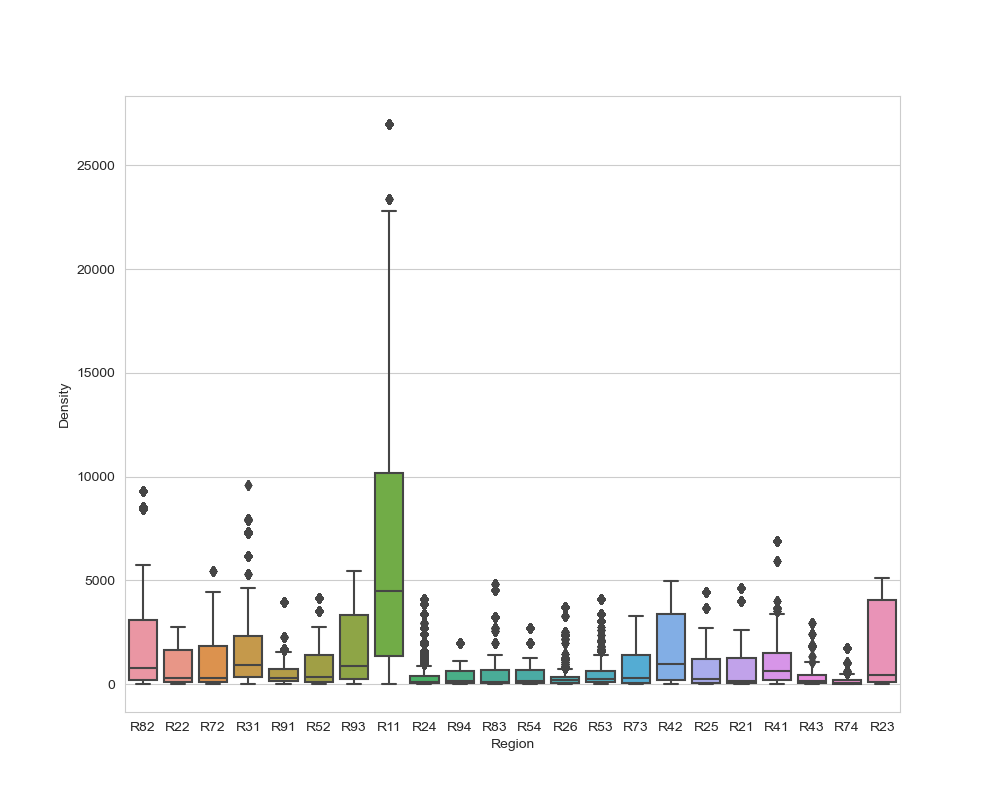

In [656]:
plt.figure(figsize = (10,8))
sns.boxplot(data = data_complete, y= 'Density', x = 'Region')
plt.show()

# Fit a Model:

The baseline model shall be a linear regression. The assumptions of a linear regression model are:

1. Correctly specified: The conditional expectation function CEF $E(Y|X)$ is linear, i.e. $E(Y|X) = X\cdot\beta\Rightarrow Y = E(Y|X) + u = X\cdot\beta + u$
2. Homoscedasticity: $E(u|X)$ is constant.
3. Independence: $Y_i,Y_j$ independent $\forall i,j\in\{1,...,N\}, i\neq j$
4. Normality: Random variable $Y|X=x$ is normally distributed for all x in the support of X (necessary for the t statistics)

The independence of $Y_i,Y_j (i\neq j)$ seems to be likely and plausible since policy holder $i's$ decision to claim due to accidents doesn't seem to be affected by policy holder $j$.

Whether the linear model is correctly specified or not is always hard to tell. Since there isn't any contradicting observation made so far, it seems plausible to give it a try.

Normality and Homoskedasticity are characteristics which can be and will tested for.

### Data Preparation:

In [3]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler


In [4]:
data_train = pd.read_csv("./data_train.csv", index_col=0)
data_test = pd.read_csv("./data_test.csv", index_col=0)

Cut off the outliers in the dataset given the distribution of target (Use interquatile distance of targets > 0):

In [5]:
print("Q3 + 1.5*IQD: %f"%float(data_train[data_train['target']>0]['target'].quantile(0.75) + 1.5*(data_train[data_train['target']>0]['target'].quantile(0.75)-data_train[data_train['target']>0]['target'].quantile(0.25))))

Q3 + 1.5*IQD: 10214.966739


In [6]:
data_train_cut = data_train.iloc[data_train.index[data_train['target']<= 10214.966739130436]].copy()
data_test_cut = data_test.iloc[data_test.index[data_test['target']<= 10214.966739130436]].copy()

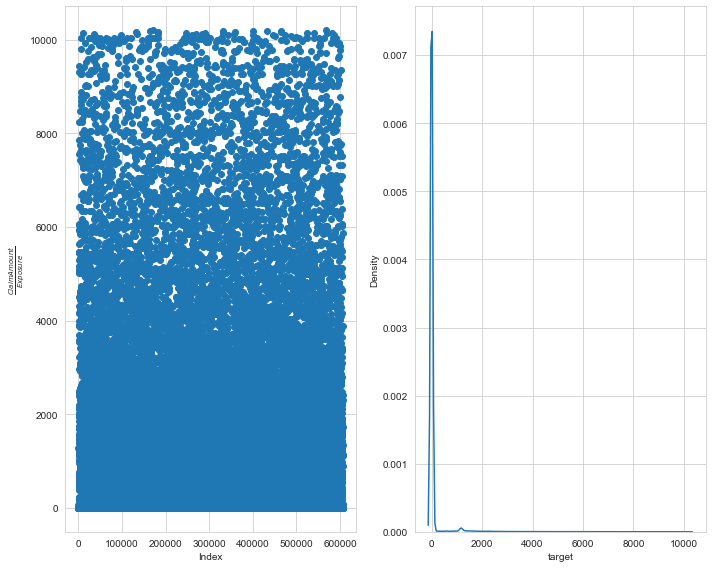

In [7]:
fig,ax = plt.subplots(1,2, figsize = (10,8))
ax[0].scatter(np.arange(data_train_cut.shape[0]), data_train_cut['target'])
ax[0].set_xlabel("Index")
ax[0].set_ylabel(r"$\frac{ClaimAmount}{Exposure}$")
sns.kdeplot(data_train_cut['target'], ax = ax[1])
plt.tight_layout()
plt.show()

In [8]:
print("Share of claims > 0 before cut: %f"%(data_train['target']>0).mean())
print("Share of claims > 0 after cut: %f"%(data_train_cut['target']>0).mean())

Share of claims > 0 before cut: 0.050312
Share of claims > 0 after cut: 0.043397


### OLS Regression:

Since the distribution of *target* is heavily skewed, a monotonic transformation ($\sqrt{}$) should help to alleviate the problem of the effect of some "outliers".

In [18]:
data_train_cut.loc[:, 'target_sqrt'] = np.sqrt(data_train_cut['target'])
data_train_cut.loc[:, 'Density_log'] = np.log(data_train_cut['Density'])
data_test_cut.loc[:, 'target_sqrt'] = np.sqrt(data_test_cut['target'])
data_test_cut.loc[:, 'Density_log'] = np.log(data_test_cut['Density'])

In [882]:
model = smf.ols(formula = "target_sqrt ~ C(VehPower) + VehAge + DrivAge + BonusMalus + C(VehBrand) + C(VehGas) + Density_log + C(Region)", data = data_train_cut)
res = model.fit()

In [883]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            target_sqrt   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     71.05
Date:                Sun, 07 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:41:41   Log-Likelihood:            -2.2357e+06
No. Observations:              605801   AIC:                         4.472e+06
Df Residuals:                  605753   BIC:                         4.472e+06
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -2.5661 

**Interpretation of the results:**

* adjusted R^2 is close to zero, i.e. that almost no variance (only 0.5%) of $Y$ is explained by the regressors $X$
* the p value of the F statistic is close to zero, i.e. that there is at least one regressor which coefficient  is significant
* Due to the monotonic and nonlinear transformation, $\hat{\beta}$ is not an unbiased estimator

### Test of normality:
Test whether the distribution of the residuals is normal using the Jarque-Bera Test. In the output above it is clearly the case $(p\approx 0)$ that the Null hypothesis can be rejected. The distribution of the residuals thus can be assumed to be not normal.

In [888]:
from statsmodels.graphics.gofplots import qqplot

<IPython.core.display.Javascript object>


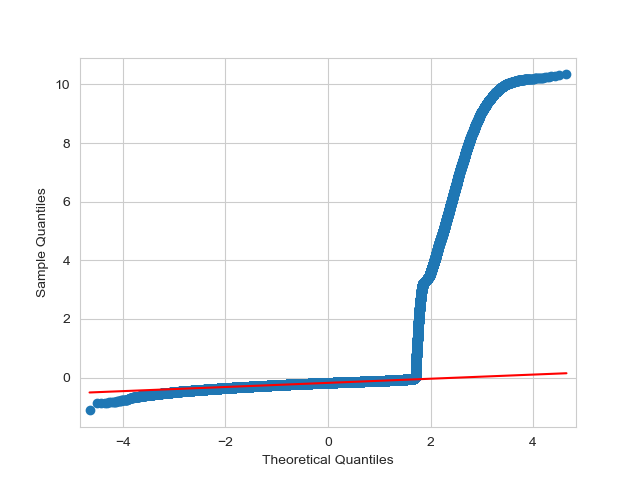

<IPython.core.display.Javascript object>


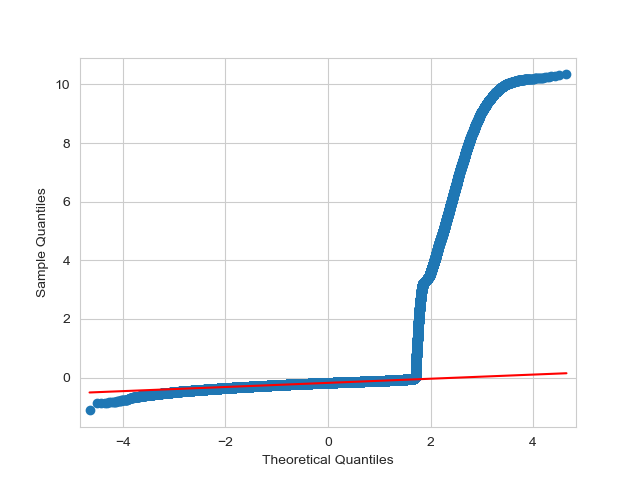

In [889]:
qqplot((res.resid-np.mean(res.resid))/np.std(res.resid), dist=scipy.stats._continuous_distns.norm, line = 'q', fit = True)

It is also empirically visible that the right tail of the residual distribution is much fatter than in case of a Normal distribution. This means that there is way more probability mass on the right tail which results in a higher likelihood of outliers.

The test implicates that the residuals and thus the response variable is not normally distributed. Therefore, all t-statistics in the output above are **wrong** and cannot be used for interpretation.

### Test for heteroskedasticity:
Test the residuals for heteroskedasticity by applying the **White test**:

In [890]:
import statsmodels
from statsmodels.stats.diagnostic import het_white

In [ ]:
white_test = het_white(res.resid, model.exog)

### Problem of multicollinearity:
As *statsmodels* notes in the footer of the output, multicolinearity seems to be an issue in the estimation since the condition number of $X'\cdot X$ is extremely large.

The descriptive analysis above showed that there isn't any (near) perfect correlation between the input variables. Thus, one solution could be to reduce the number of categories of the nominal and ordinal variables to reduce the number of dummies necessary in the regression.

On the other hand, it is also plausible to apply a Ridge or even Lasso regression. The former one adds a diagonal matrix onto $X'\cdot X$ stabilizing the matrix (by decreasing the condition number) before inverting it: $(X'\cdot X + \lambda\cdot I)$.

<IPython.core.display.Javascript object>


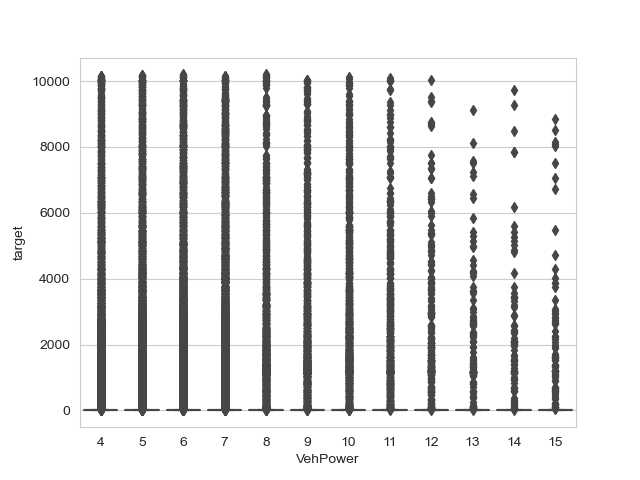

In [926]:
plt.figure()
sns.boxplot(data = data_train_cut, y= 'target', x = 'VehPower')
plt.show()

In [17]:
# VehPower: Divide data in three classes (slow<=10, fast>=11)
veh_power = data_train_cut['VehPower'].copy()
data_train_cut['VehPower_cat'] = 0*(veh_power<=10) +\
                                 1*(veh_power> 11)
veh_power = data_test_cut['VehPower'].copy()
data_test_cut['VehPower_cat'] = 0*(veh_power<=10) +\
                                 1*(veh_power> 11)

In [928]:
for brand in data_train_cut['VehBrand'].unique():
    
    target_brand = data_train_cut[data_train_cut['VehBrand']==brand]['target']
    
    print("Mean: %f"%target_brand.mean())
    print("Median: %f"%target_brand.median())
    print("std: %f"%target_brand.std())
    print("97%% quant: %f"%target_brand.quantile(0.97))
    print("\n")

Mean: 115.954001
Median: 0.000000
std: 750.031946
97% quant: 1254.166667


Mean: 92.658179
Median: 0.000000
std: 590.023195
97% quant: 1128.120000


Mean: 99.586133
Median: 0.000000
std: 615.084717
97% quant: 1172.000000


Mean: 91.930321
Median: 0.000000
std: 593.983072
97% quant: 1128.120000


Mean: 89.948390
Median: 0.000000
std: 576.443178
97% quant: 1128.120000


Mean: 85.735522
Median: 0.000000
std: 580.379098
97% quant: 1128.120000


Mean: 93.838013
Median: 0.000000
std: 601.814701
97% quant: 1128.120000


Mean: 100.205750
Median: 0.000000
std: 659.313147
97% quant: 1126.506000


Mean: 91.421085
Median: 0.000000
std: 597.555057
97% quant: 1128.120000


Mean: 99.024314
Median: 0.000000
std: 650.792071
97% quant: 1128.120000


Mean: 71.274125
Median: 0.000000
std: 488.342725
97% quant: 606.279873




<IPython.core.display.Javascript object>


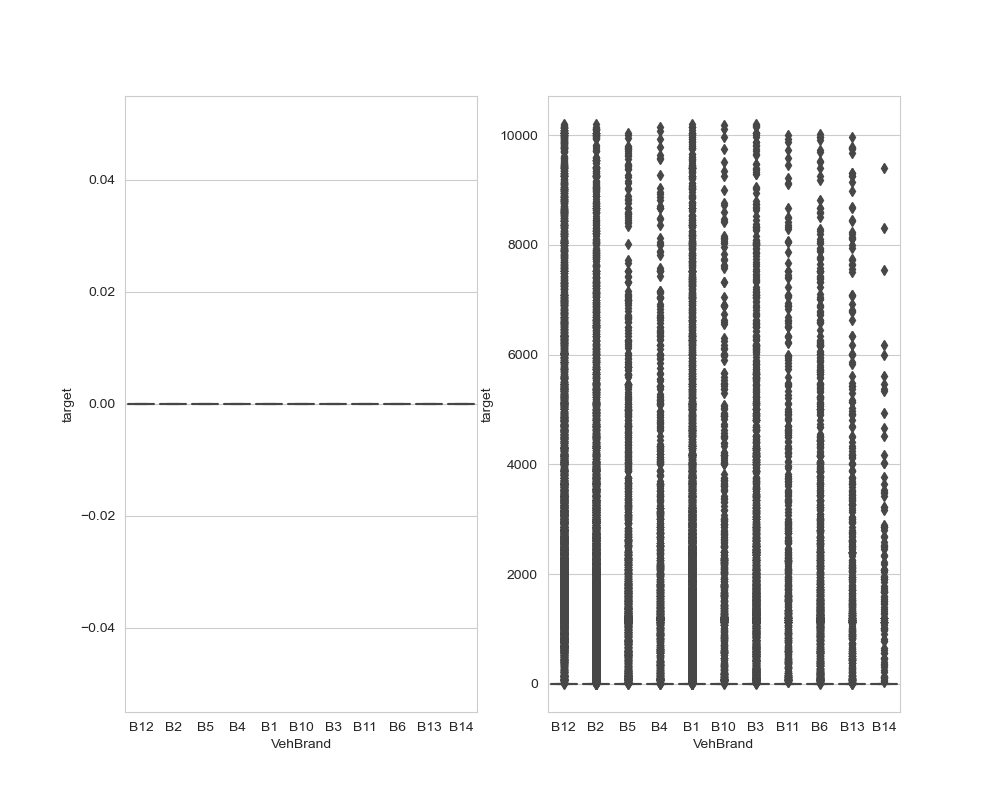

In [929]:
fig, ax = plt.subplots(1,2, figsize = (10,8))
sns.boxplot(data = data_train_cut, y = 'target', x = 'VehBrand', showfliers = False, ax = ax[0])
sns.boxplot(data = data_train_cut, y = 'target', x = 'VehBrand', showfliers = True, ax = ax[1])
plt.show()

There doesn't seem to be a very strong relationship of *target* and *VehBrand* so instead of adding it to the regression it can be left out. Same can be said about *VehGas*:

<IPython.core.display.Javascript object>


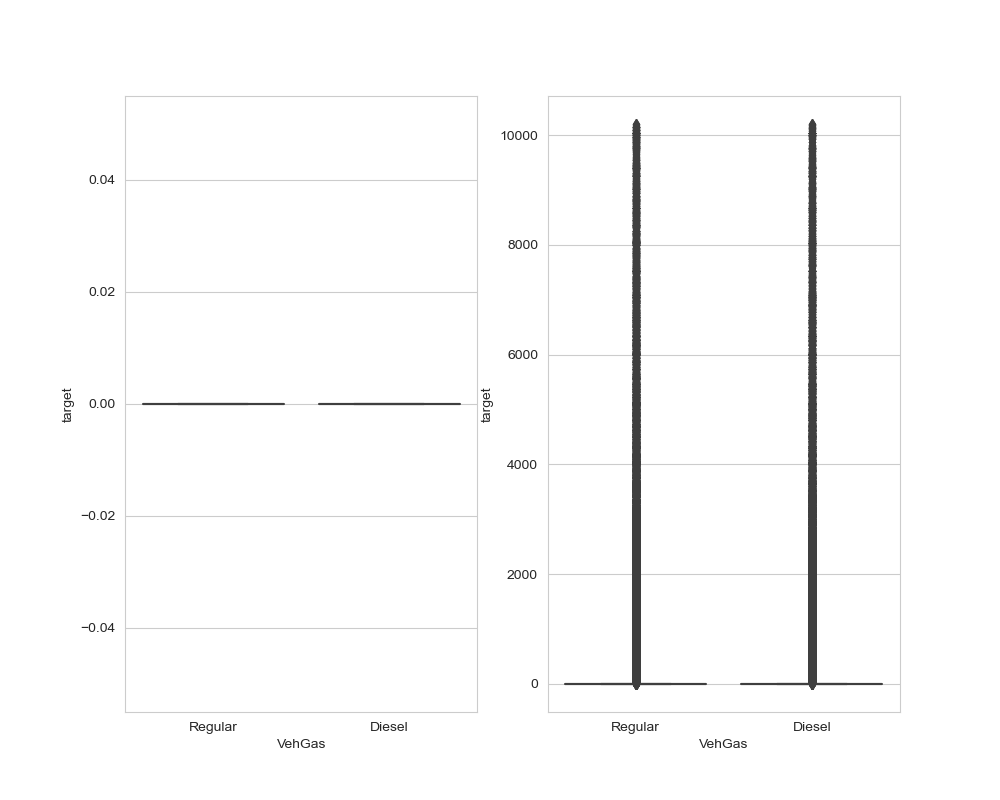

In [930]:
fig, ax = plt.subplots(1,2, figsize = (10,8))
sns.boxplot(data = data_train_cut, y = 'target', x = 'VehGas', showfliers = False, ax = ax[0])
sns.boxplot(data = data_train_cut, y = 'target', x = 'VehGas', showfliers = True, ax = ax[1])
plt.show()

In [922]:
for brand in data_train_cut['VehGas'].unique():
    
    target_brand = data_train_cut[data_train_cut['VehGas']==brand]['target']
    
    print("Mean: %f"%target_brand.mean())
    print("Median: %f"%target_brand.median())
    print("std: %f"%target_brand.std())
    print("97%% quant: %f"%target_brand.quantile(0.97))
    print("98%% quant: %f"%target_brand.quantile(0.98))
    print("99%% quant: %f"%target_brand.quantile(0.99))
    print("\n")

Mean: 104.943878
Median: 0.000000
std: 664.147491
97% quant: 1172.000000
98% quant: 1683.761194
99% quant: 3255.555556


Mean: 90.793854
Median: 0.000000
std: 601.002311
97% quant: 1128.120000
98% quant: 1464.959740
99% quant: 2800.000000




<IPython.core.display.Javascript object>


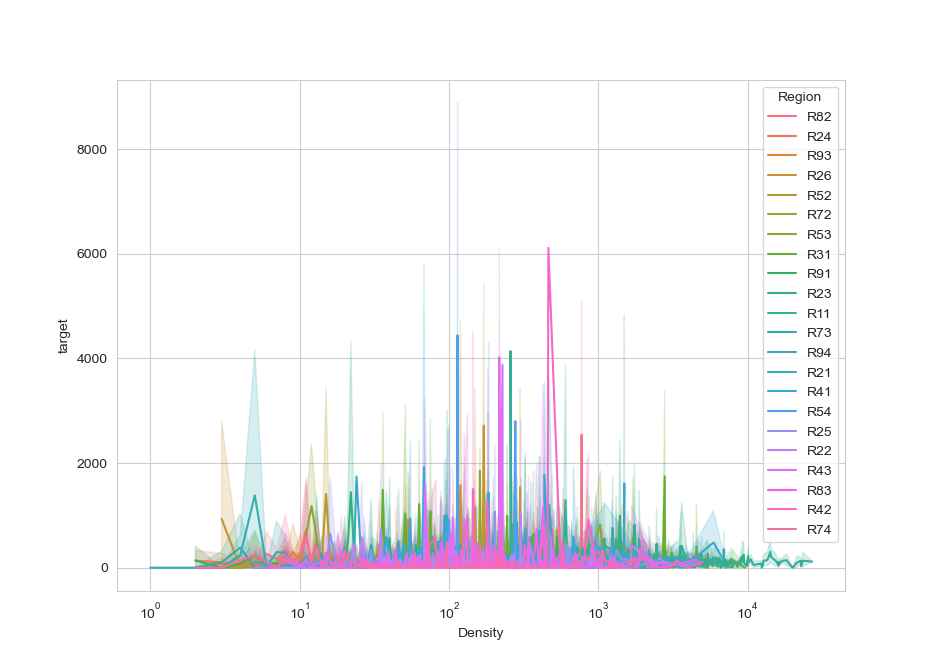

In [944]:
fig, ax = plt.subplots(1,1)
sns.lineplot(data=data_train_cut, hue = 'Region', x = 'Density', y = 'target', ax = ax)
plt.xscale('log')
plt.show()

No clear pattern is visible in this plot regarding the region in comparison of the influence of the density (lower target when density is very low or very high)

In [933]:
model = smf.ols(formula = "target_sqrt ~ C(VehPower_cat) + VehAge + DrivAge + BonusMalus + Density_log ", data = data_train_cut)
res = model.fit()

In [934]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            target_sqrt   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     524.6
Date:                Sun, 07 Jan 2024   Prob (F-statistic):               0.00
Time:                        16:02:13   Log-Likelihood:            -2.2361e+06
No. Observations:              605801   AIC:                         4.472e+06
Df Residuals:                  605795   BIC:                         4.472e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -1.9021 

Although the multicollinearity disappeared by modifying the geographical informations, it is still the case that the Jarque-Bera Test rejects the Null hypothesis. Therefore, the residuals are still not normally distributed (which was to be expected). The White Test still rejects the Null hypothesis, meaning that we have heteroskedasticity in the residuals ($\sigma_i\neq\sigma\quad\exists i\in\{1,...,N\}$). As a result, the OLS estimator is not efficient anymore and the t statistics are wrong.

In [949]:
# Residuen heteroskedastisch?
white_test = het_white(res.resid, model.exog)
print("p-value: %f"%white_test[1])

p-value: 0.000000


<IPython.core.display.Javascript object>


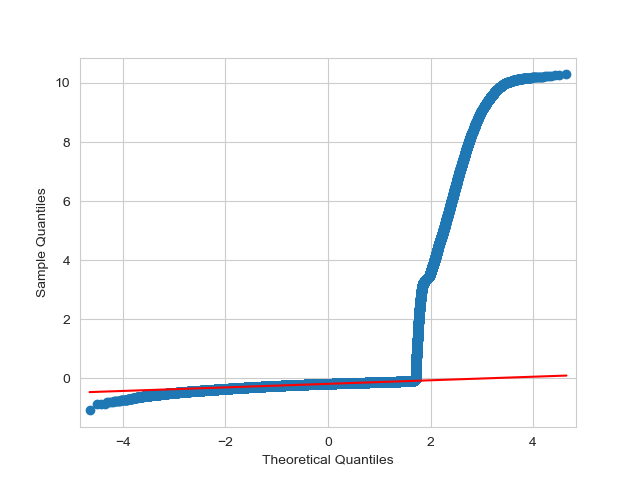

<IPython.core.display.Javascript object>


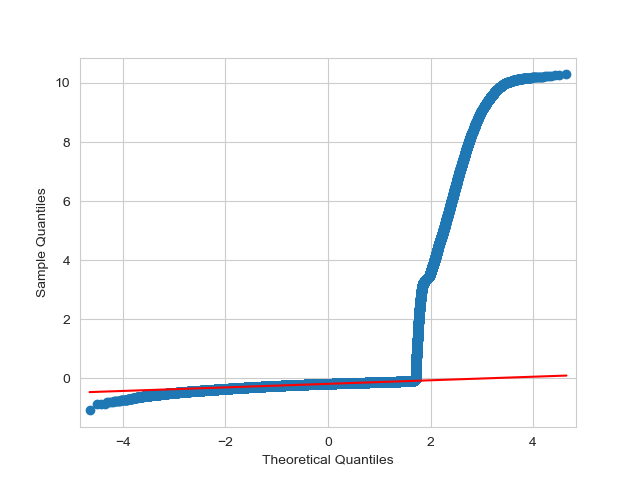

In [950]:
# Residuen normalverteilt?
qqplot((res.resid-np.mean(res.resid))/np.std(res.resid), dist=scipy.stats._continuous_distns.norm, line = 'q', fit = True)

The question now is whether interaction effects help to better explain the variance of the 
dependent variable better. Therefore, a linear regression 
regression with interaction terms.

In [951]:
model = smf.ols(formula = "target_sqrt ~ (C(VehPower_cat) + VehAge + DrivAge + BonusMalus + Density_log)**2", data = data_train_cut)
res = model.fit()

In [952]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            target_sqrt   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     180.1
Date:                Sun, 07 Jan 2024   Prob (F-statistic):               0.00
Time:                        16:45:28   Log-Likelihood:            -2.2361e+06
No. Observations:              605801   AIC:                         4.472e+06
Df Residuals:                  605785   BIC:                         4.472e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

## Fit Nonlinear Modell:              Random Forests

In [9]:
def map_category_to_int(var_name, data, inverse = False):
    
    region_mapping = {'R82': 0,'R22': 1,'R72': 2,'R31': 3,'R91': 4,'R52': 5,'R93': 6,'R11': 7,'R24': 8,'R94': 9,'R83': 10,'R54': 11,'R26': 12,'R53': 13,'R73': 14,'R42': 15,'R25': 16,'R21': 17,'R41': 18,'R43': 19,'R74': 20,'R23': 21}
    area_mapping = {"A": 0, "B": 1, "C": 2, "D": 3, "E":4, "F": 5}
    brand_mapping = {'B12': 0,'B6': 1,'B3': 2,'B2': 3,'B5': 4,'B10': 5,'B14': 6,'B13': 7,'B4': 8,'B1': 9,'B11': 10}
    gas_mapping = {'Regular': 0,'Diesel':1}
    inv_region_mapping = {v: k for k, v in region_mapping.items()}
    inv_area_mapping = {v: k for k, v in area_mapping.items()}
    inv_brand_mapping = {v: k for k, v in brand_mapping.items()}
    inv_gas_mapping = {v: k for k, v in gas_mapping.items()}
    
    if type(data) is pd.DataFrame:
        data = data[var_name]
    
    if not inverse:
        if "VehPower" in var_name:
            return data # already assigned to integer categories!
        elif "Area" in var_name:
            data = [area_mapping[el] for el in data]
        elif "Region" in var_name:
            data = [region_mapping[el] for el in data]
        elif "VehBrand" in var_name:
            data = [brand_mapping[el] for el in data]
        elif "VehGas" in var_name:
            data = [gas_mapping[el] for el in data]
        else:
            raise Exception
    else:
        if "VehPower" in var_name:
            return data # already assigned to integer categories!
        elif "Area" in var_name:
            data = [inv_area_mapping[el] for el in data]
        elif "Region" in var_name:
            data = [inv_region_mapping[el] for el in data]
        elif "VehBrand" in var_name:
            data = [inv_brand_mapping[el] for el in data]
        elif "VehGas" in var_name:
            data = [inv_gas_mapping[el] for el in data]
        else:
            raise Exception
        
    return data


def min_max_scaling(tensor):
    for col in range(tensor.shape[1]):
        tensor[:,col] = (tensor[:,col] - tensor[:,col].min()) / (tensor[:,col].max() - tensor[:,col].min())
    return tensor


In [42]:
model = smf.ols(formula = "target_sqrt ~ (C(VehPower_cat) + VehAge + DrivAge + BonusMalus + Density_log)**2", data = data_train_cut)
res = model.fit()

In [43]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder


X_train = data_train_cut[['VehPower_cat', 'VehAge', 'DrivAge', 'BonusMalus', 'Density_log']]
y_train = np.sqrt(data_train_cut['target'])
X_test = data_train_cut[['VehPower_cat', 'VehAge', 'DrivAge', 'BonusMalus', 'Density_log']]
y_test = np.sqrt(data_train_cut['target'])

# Train the Random Forest model
model = RandomForestRegressor(n_estimators=100,
                              random_state=42,
                              max_depth = 10000,
                              min_samples_split = 3,
                              max_features = 0.7,
                              bootstrap = True,
                              n_jobs = -1,
                              verbose = 100)
model.fit(X_train, y_train)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
building tree 1 of 100building tree 2 of 100
building tree 3 of 100
building tree 4 of 100

building tree 5 of 100[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.0s

building tree 6 of 100[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.1s

building tree 7 of 100[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    3.3s

building tree 8 of 100[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    3.3s

building tree 9 of 100[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.6s

building tree 10 of 100[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    6.0s

building tree 11 of 100[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    6.1s

building tree 12 of 100[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    6.3s

building tree 13 of 100[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    8.6s

building tree 14 of 100[Parallel(n_jobs=-1)]: Done  10 tas

building tree 100 of 100
[Parallel(n_jobs=-1)]: Done  97 out of 100 | elapsed:  1.2min remaining:    2.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.2min finished


RandomForestRegressor(max_depth=10000, max_features=0.7, min_samples_split=3,
                      n_jobs=-1, random_state=42, verbose=100)

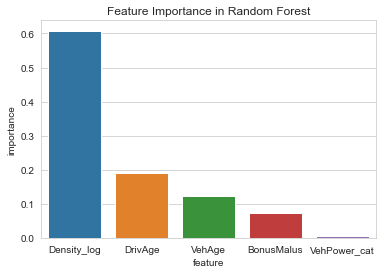

In [44]:
# Extrahieren Sie die Feature Importance
feature_importances = model.feature_importances_

# Erstellen Sie ein DataFrame, um die Feature Importance anzuzeigen
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importances
})

# Sortieren Sie das DataFrame nach der Feature Importance
importance_df = importance_df.sort_values(by='importance', ascending=False)

plt.figure()
sns.barplot(data = importance_df, x = 'feature', y = 'importance')
plt.title("Feature Importance in Random Forest")
plt.show()

In [45]:
# Evaluate the model using R-squared
y_pred_train = model.predict(X_train)
score_train = r2_score(y_train, y_pred_train)
y_pred_test = model.predict(X_test)
score_test = r2_score(y_test, y_pred_test)

print("R-squared score on the train set: %f"%score_train)
print("R-squared score on the test set: %f"%score_test)
print("RMSE on the train data set: %f"%np.sqrt(np.sum((y_pred_train-y_train)**2)))
print("RMSE on the test data set: %f"%np.sqrt(np.sum((y_pred_test-y_test)**2)))


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done  11 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done  13 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done  15 tasks      | elapsed:    1.5s
[Para

[Parallel(n_jobs=4)]: Done  37 tasks      | elapsed:    3.5s
[Parallel(n_jobs=4)]: Done  38 tasks      | elapsed:    3.5s
[Parallel(n_jobs=4)]: Done  39 tasks      | elapsed:    3.5s
[Parallel(n_jobs=4)]: Done  40 tasks      | elapsed:    3.6s
[Parallel(n_jobs=4)]: Done  41 tasks      | elapsed:    3.9s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.9s
[Parallel(n_jobs=4)]: Done  43 tasks      | elapsed:    3.9s
[Parallel(n_jobs=4)]: Done  44 tasks      | elapsed:    3.9s
[Parallel(n_jobs=4)]: Done  45 tasks      | elapsed:    4.2s
[Parallel(n_jobs=4)]: Done  46 tasks      | elapsed:    4.2s
[Parallel(n_jobs=4)]: Done  47 tasks      | elapsed:    4.2s
[Parallel(n_jobs=4)]: Done  48 tasks      | elapsed:    4.3s
[Parallel(n_jobs=4)]: Done  49 tasks      | elapsed:    4.6s
[Parallel(n_jobs=4)]: Done  50 tasks      | elapsed:    4.6s
[Parallel(n_jobs=4)]: Done  51 tasks      | elapsed:    4.6s
[Parallel(n_jobs=4)]: Done  52 tasks      | elapsed:    4.6s
[Parallel(n_jobs=4)]: Do

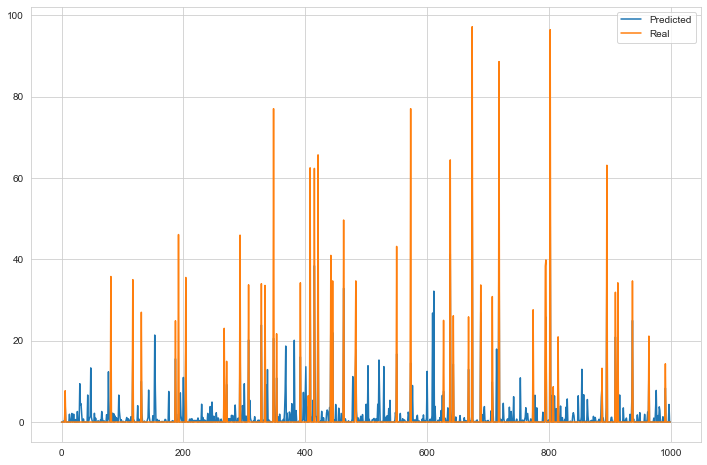

In [46]:
start_index = 0
end_index = 1000

plt.figure(figsize = (12,8))
plt.plot(np.arange(start_index, end_index), y_pred_train[start_index:end_index])
plt.plot(np.arange(start_index, end_index), y_train[start_index:end_index])
plt.legend(["Predicted", "Real"])
plt.show()

## Fit nonlinear Model:     Neural Network

In [81]:
batch_size = 32768
num_epochs = 100

In [82]:
import torch
from torch import nn

In [85]:
metric_vars = min_max_scaling(torch.tensor(data_train_cut[['VehAge', 'DrivAge', 'BonusMalus', 'Density_log']].to_numpy()).float())
target_var = min_max_scaling(torch.tensor(np.sqrt(data_train_cut['target'].to_numpy())).reshape(-1,1))
one_hot_vehpower = nn.functional.one_hot(torch.tensor(data_train_cut['VehPower_cat'].values).long())

inp_var = torch.concat((target_var,\
                       metric_vars,\
                       one_hot_vehpower), axis = 1).float()

In [1]:
# Convert dataframe to a torch dataset:
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    
    def __init__(self, dataframe):
        self.data = dataframe

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        
        inputs = self.data[idx, 1:]
        labels = self.data[idx, :1]
        
        return (inputs, labels)


In [980]:
sep_index = int(np.ceil(inp_var.shape[0]))

dataset_train = CustomDataset(inp_var[:sep_index, :])
dataset_val = CustomDataset(inp_var[sep_index:, :])

train_loader, val_loader = DataLoader(dataset_train, batch_size=batch_size, drop_last=False),\
                            DataLoader(dataset_val, batch_size=batch_size, drop_last=False)

def CustomMSELoss(inp, label, weights):
        
    return (((inp-label)**2)*weights).mean()

loss_func = CustomMSELoss #nn.MSELoss(reduction = 'sum')

In [987]:
# Build a flexible neural net in Pytorch:
class NeuralNetwork(nn.Module):
    
    def __init__(self, inp_dim, num_layers):
        
        super().__init__()
        
        layer_list = []
        
        layer_list.append(nn.Linear(inp_dim, 64))
        layer_list.append(nn.Sigmoid())
        
        for _ in range(num_layers-2):
            
            layer_list.append(nn.BatchNorm1d(64))
            layer_list.append(nn.Linear(64, 64))
            layer_list.append(nn.Sigmoid())
            
        layer_list.append(nn.BatchNorm1d(64))
        layer_list.append(nn.Linear(64, 1)) # Identity as last layer's activation function
        layer_list.append(nn.ReLU())

        self.net = nn.Sequential(*layer_list)
        
    def forward(self, inp):
        
        return self.net(inp)
        
            

In [988]:
net = NeuralNetwork(inp_var.shape[1]-1,3)
opt_net = torch.optim.Adam(params = net.parameters(), lr = 1*10**-3)

In [989]:
# Start of training loop:
loss_train = [0.0 for _ in range(num_epochs)]
loss_val = [0.0 for _ in range(num_epochs)]

for epoch in range(num_epochs):

    # Reset loss:
    loss = 0

    for iteration, (data, label) in enumerate(train_loader, 0):
        
        opt_net.zero_grad()
        net.zero_grad()
        
        prediction = net(data)
        
        # Calculate loss:
        loss = loss_func(prediction, label, weights = (label>0)*1 + (label<=0)*1) #loss_func(prediction, label)
        loss_train[epoch] += loss.item()
        loss = loss.mean()
        
        # Backprop of loss:
        loss.backward()
        
        # Adjust parameters of net:
        opt_net.step()
        
    
    # Calculate validation loss:
    with torch.no_grad():
        
        for iteration, (data, label) in enumerate(val_loader, 0):

            prediction = net(data)
            # Calculate loss:
            loss = loss_func(prediction, label)
            loss_val[epoch] += loss.item()
            
    print("Iteration %i\n Train Loss: %f\n Val. Loss: %f"%(epoch, loss_train[epoch], loss_val[epoch]))
    


Iteration 0
 Train Loss: 6.749091
 Val. Loss: 0.000000
Iteration 1
 Train Loss: 5.647899
 Val. Loss: 0.000000
Iteration 2
 Train Loss: 5.655284
 Val. Loss: 0.000000
Iteration 3
 Train Loss: 5.660367
 Val. Loss: 0.000000
Iteration 4
 Train Loss: 5.663637
 Val. Loss: 0.000000
Iteration 5
 Train Loss: 5.658779
 Val. Loss: 0.000000
Iteration 6
 Train Loss: 5.686051
 Val. Loss: 0.000000
Iteration 7
 Train Loss: 5.683658
 Val. Loss: 0.000000
Iteration 8
 Train Loss: 5.685895
 Val. Loss: 0.000000
Iteration 9
 Train Loss: 5.685895
 Val. Loss: 0.000000


KeyboardInterrupt: 

In [1]:
plt.figure()
plt.plot(inp_var[:,:1])
plt.plot(net(inp_var[:,1:]).detach().numpy())
plt.show()

NameError: name 'plt' is not defined

<font color = red>**Disclaimer:**</font> I only read up on the topic of Generalized Linear Models during the Data Science Challenge and therefore cannot fully guarantee the correctness of the estimates below or their interpretation!

In [68]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [69]:
mod1 = smf.glm(formula= "target ~ C(VehPower_cat) + VehAge + DrivAge + BonusMalus + Density_log"
               , data=data_train_cut[data_train_cut['target']>0], family=sm.families.Gamma(link = sm.families.links.log())).fit()

In [70]:
print(mod1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 target   No. Observations:                26290
Model:                            GLM   Df Residuals:                    26284
Model Family:                   Gamma   Df Model:                            5
Link Function:                    log   Scale:                         0.84509
Method:                          IRLS   Log-Likelihood:            -2.2856e+05
Date:                Tue, 09 Jan 2024   Deviance:                       22926.
Time:                        18:24:53   Pearson chi2:                 2.22e+04
No. Iterations:                    16   Pseudo R-squ. (CS):            0.02812
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                7.6801 

In [71]:
np.exp(mod1.params)

Intercept               2164.811472
C(VehPower_cat)[T.1]       1.012735
VehAge                     0.978297
DrivAge                    0.996835
BonusMalus                 1.003402
Density_log                1.019111
dtype: float64

Because the log-link function was used, the interpretation of the coefficients is as follows:
$\log(E(Y|X)) = X'\cdot\beta \Leftrightarrow E(Y|X) = e^{X'\cdot\beta} = e^{\beta_0}\cdot e^{\beta_1\cdot X_1}\cdot\dots\cdot e^{\beta_K\cdot x_K} = e^{\beta_0}\cdot (e^{\beta_1})^{X_1}\cdot\dots\cdot (e^{\beta_K})^{x_K}$

* Driving a fast car (cat. 0 switches to cat. 1) increases the expected ClaimAmount/Exposure by 1.008903
* Increasing the vehicle age by one year decreases the expected ClaimAmount/Exposure by 0.975733
* Increasing the driver age by one year decreases the expected ClaimAmount/Exposure by 0.996787
* Increasing the BonusMalus by one unit increases the expected ClaimAmount/Exposure by 1.003232
* Increasing the log-density by one unit increases the expected ClaimAmount/Exposure by 1.018737

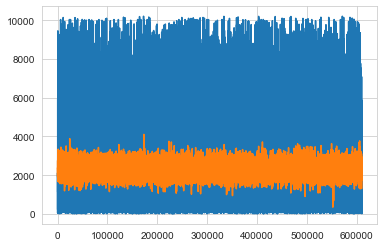

In [72]:
plt.figure()
plt.plot(data_train_cut[data_train_cut['target']>0]['target'])
plt.plot(mod1.fittedvalues)
plt.show()

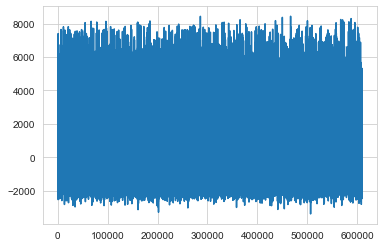

In [73]:
plt.figure()
plt.plot(mod1.resid_response)
plt.show()

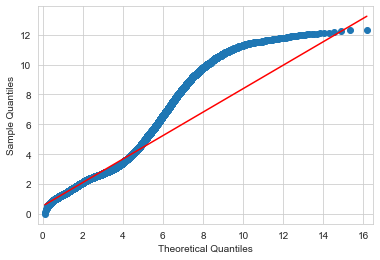

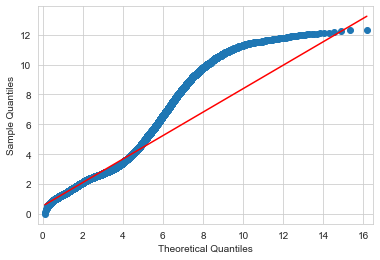

In [74]:
qqplot((mod1.resid_response-np.mean(mod1.resid_response))/np.std(mod1.resid_response), dist=scipy.stats._continuous_distns.gamma, line = 'q', fit = True)

In [80]:
mod2 = smf.glm(formula= "target ~ C(VehPower_cat) + VehAge + DrivAge + BonusMalus + Density_log"
               , data=data_train_cut, family=sm.families.Tweedie(link = sm.families.links.sqrt())).fit()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:1582: RuntimeWarning: divide by zero encountered in log
  endog * np.log(endog / mu) + (mu - endog))
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:1582: RuntimeWarning: invalid value encountered in multiply
  endog * np.log(endog / mu) + (mu - endog))


In [76]:
print(mod2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 target   No. Observations:                26290
Model:                            GLM   Df Residuals:                    26284
Model Family:                 Tweedie   Df Model:                            5
Link Function:                    log   Scale:                          1873.9
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 09 Jan 2024   Deviance:                   4.1409e+07
Time:                        18:25:13   Pearson chi2:                 4.93e+07
No. Iterations:                     7   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                7.7126 

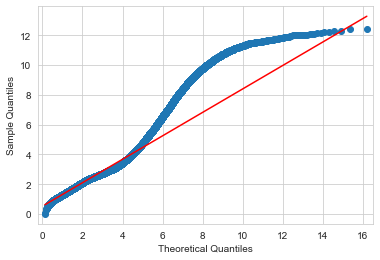

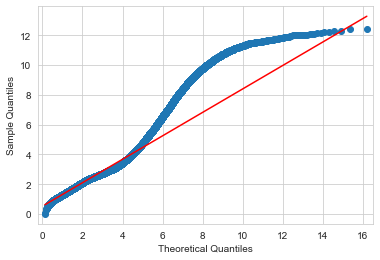

In [77]:
qqplot((mod2.resid_response-np.mean(mod1.resid_response))/np.std(mod1.resid_response), dist=scipy.stats._continuous_distns.gamma, line = 'q', fit = True)